In [1]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/covid_19_data.csv')
df.head(100)

SNo ObservationDate Province/State  Country/Region      Last Update  \
0     1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1     2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2     3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3     4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4     5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   
..  ...             ...            ...             ...              ...   
95   96      01/24/2020       Shanghai  Mainland China    1/24/20 17:00   
96   97      01/24/2020        Jiangxi  Mainland China    1/24/20 17:00   
97   98      01/24/2020        Sichuan  Mainland China    1/24/20 17:00   
98   99      01/24/2020       Shandong  Mainland China    1/24/20 17:00   
99  100      01/24/2020          Anhui  Mainland China    1/24/20 17:00   

    Confirmed  Deaths  Recovered  
0         1.0     0.0        0.0  
1        14.0     0.0        0.0  
2         6.0     0.0        0.0  
3         1.0     0.0        0.0  
4         0.0     0.0        0.0  
..        ...     ...        ...  
95       20.0     0.0        1.0  
96       18.0     0.0        0.0  
97       15.0     0.0        0.0  
98       15.0     0.0        0.0  
99       15.0     0.0        0.0  

[100 rows x 8 columns]

In [4]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace=True)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [10]:
df3 = df2.groupby(['Country', 'Date']).agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()
df3.rename(columns={'Country': 'Original_Country'}, inplace=True)


In [11]:
df3.head(100)

Original_Country       Date  Confirmed  Deaths  Recovered
0        Azerbaijan 2020-02-28        1.0     0.0        0.0
1   ('St. Martin',) 2020-03-10        2.0     0.0        0.0
2       Afghanistan 2020-02-24        1.0     0.0        0.0
3       Afghanistan 2020-02-25        1.0     0.0        0.0
4       Afghanistan 2020-02-26        1.0     0.0        0.0
..              ...        ...        ...     ...        ...
95      Afghanistan 2020-05-27    12459.0   228.0     1138.0
96      Afghanistan 2020-05-28    13039.0   236.0     1209.0
97      Afghanistan 2020-05-29    13662.0   247.0     1259.0
98      Afghanistan 2020-05-30    14528.0   250.0     1303.0
99      Afghanistan 2020-05-31    15208.0   258.0     1328.0

[100 rows x 5 columns]

In [12]:
countries = df3['Original_Country'].unique()
len(countries)

225

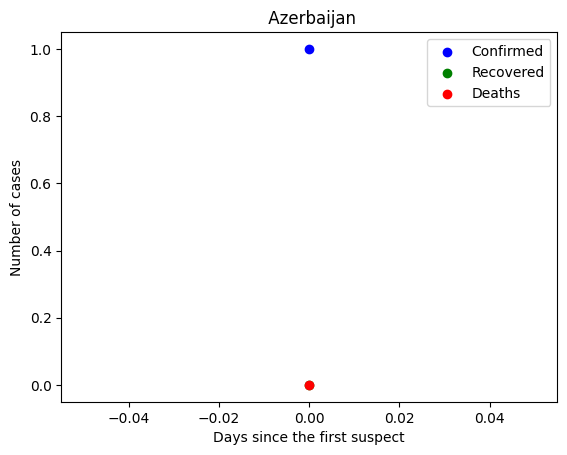

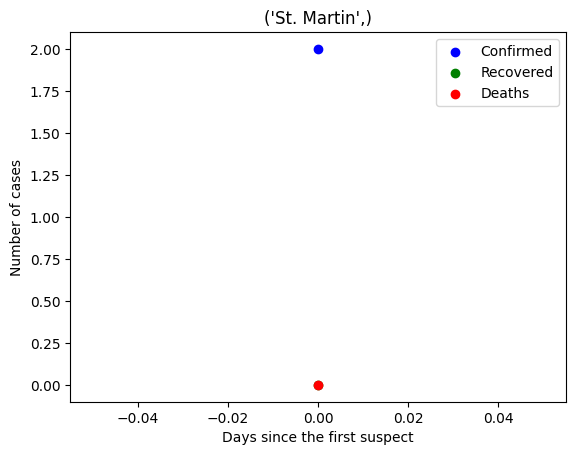

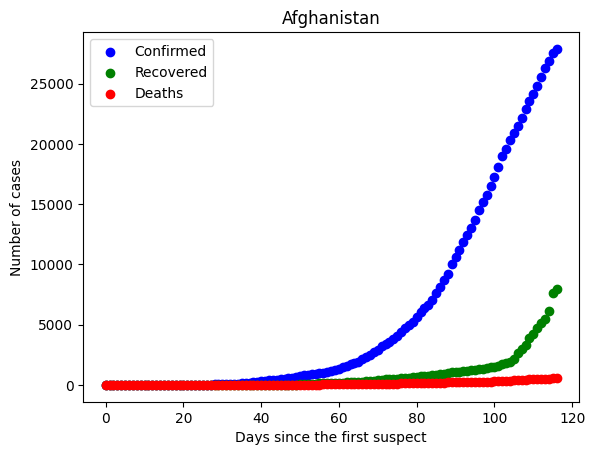

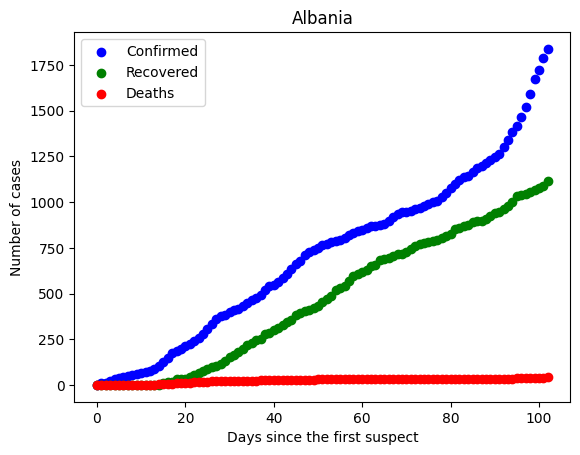

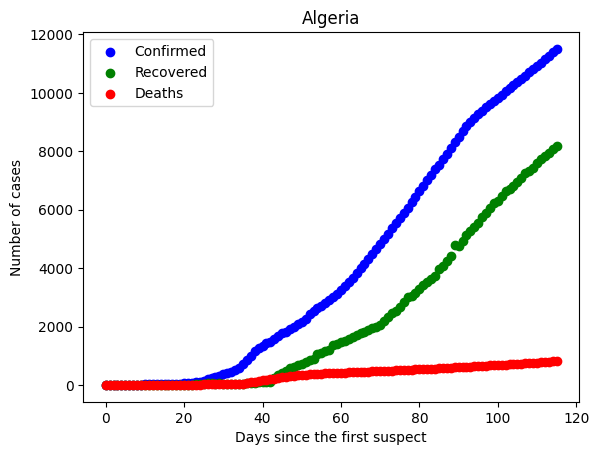

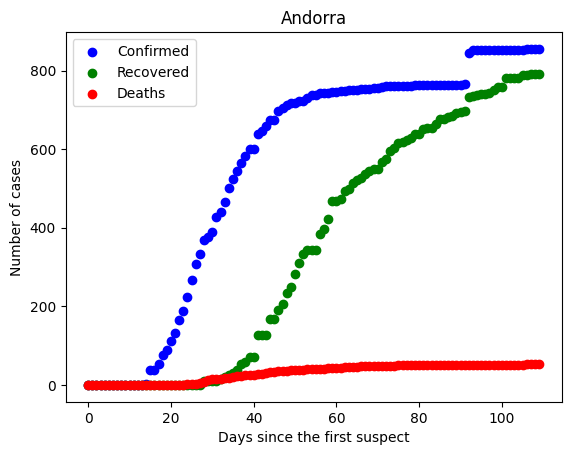

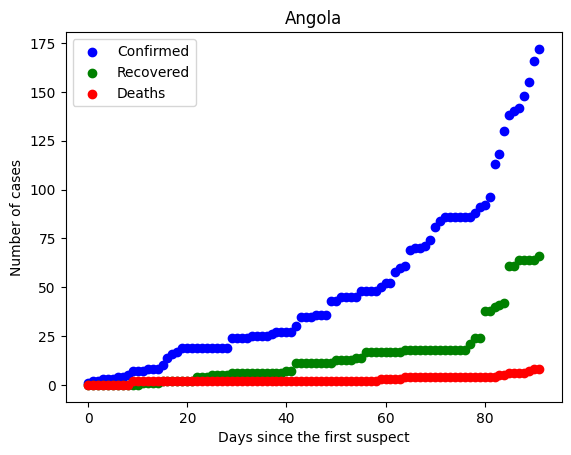

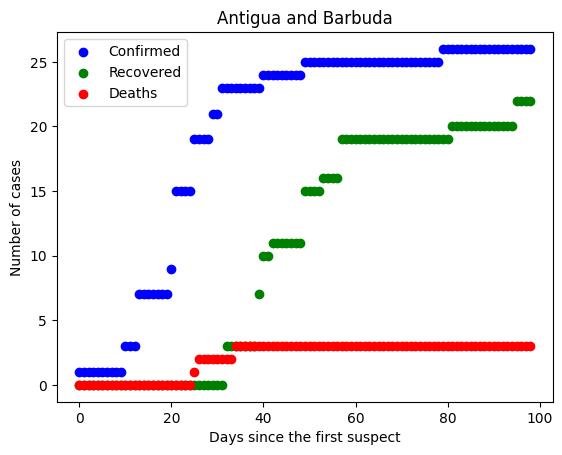

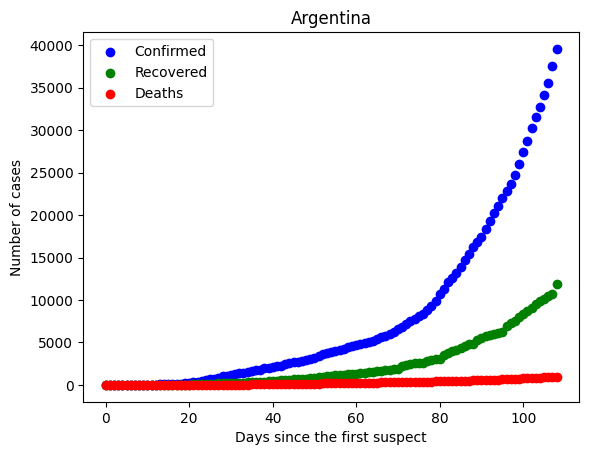

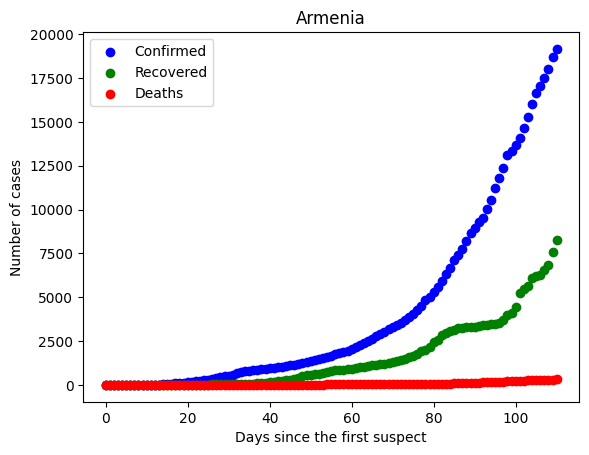

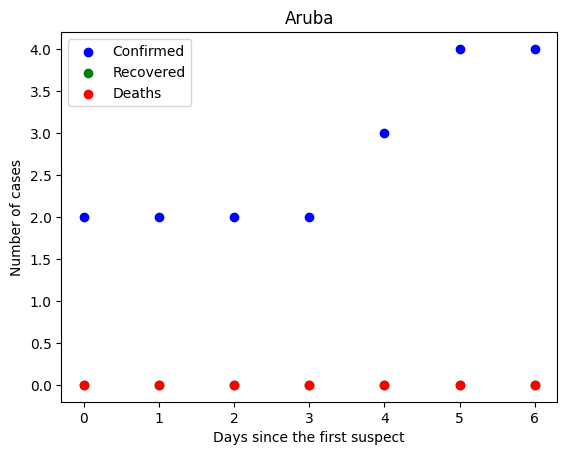

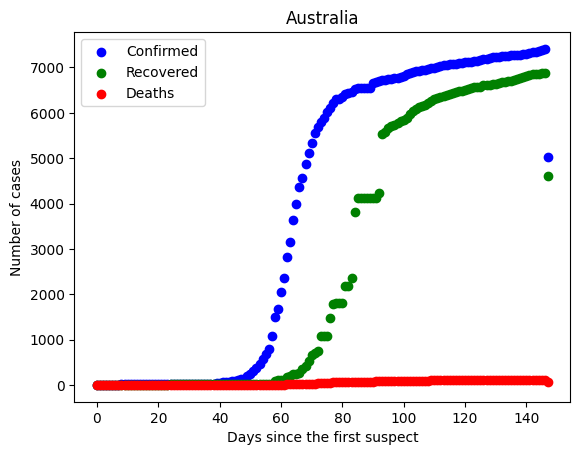

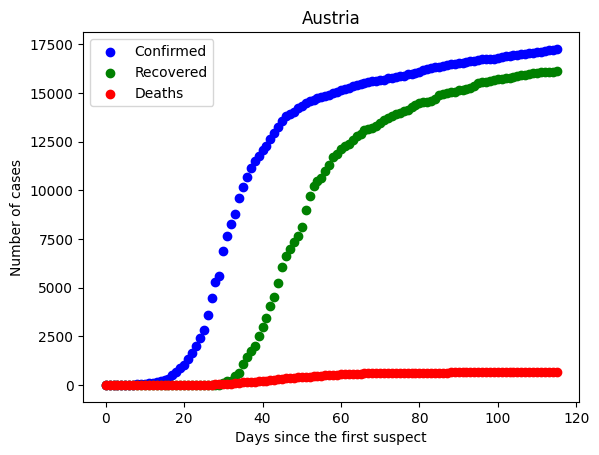

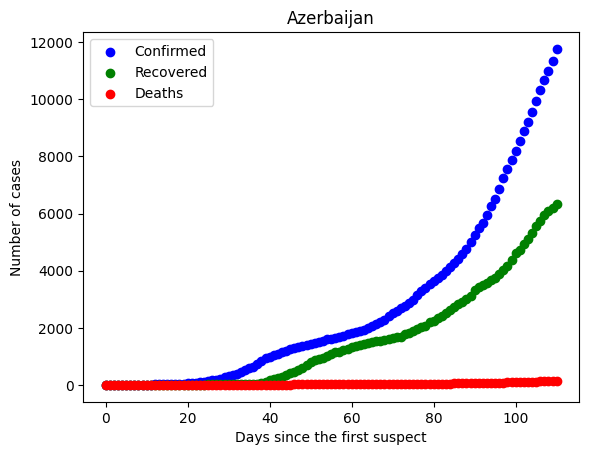

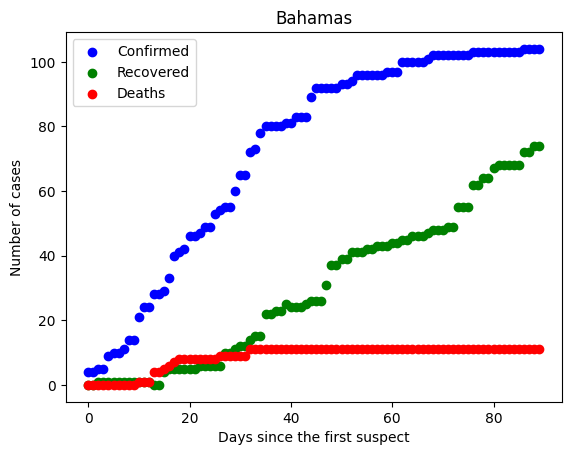

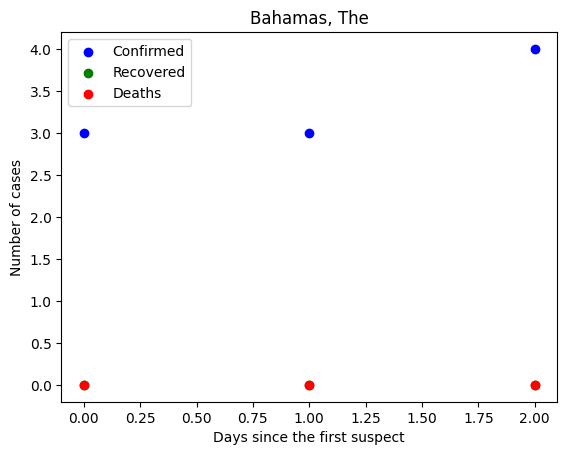

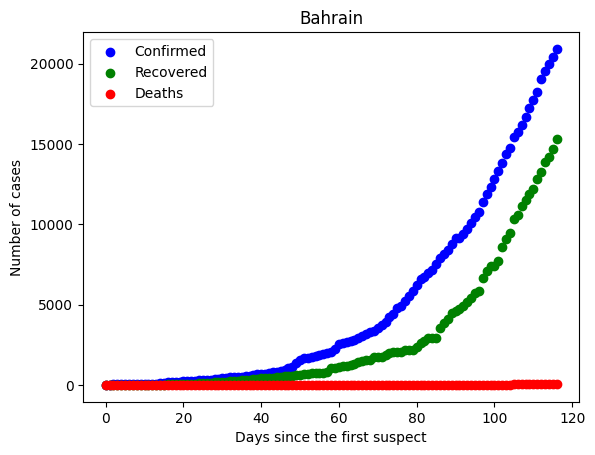

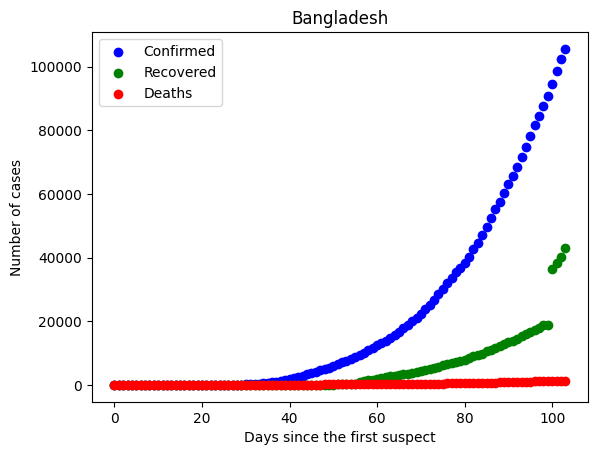

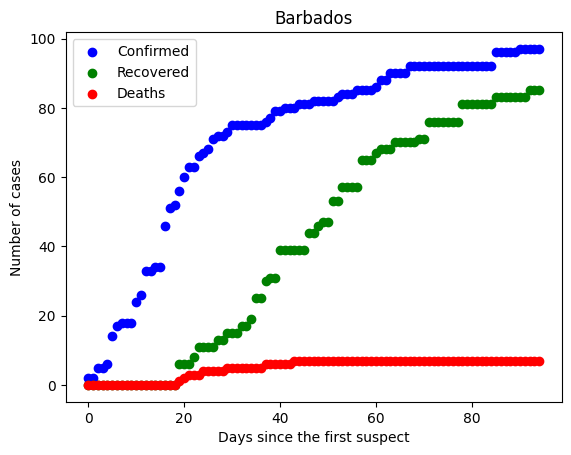

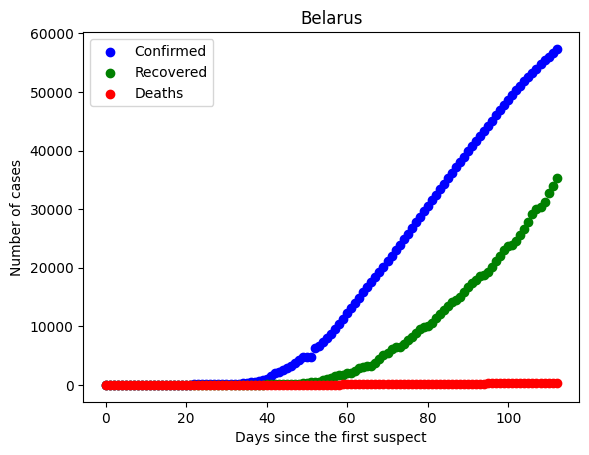

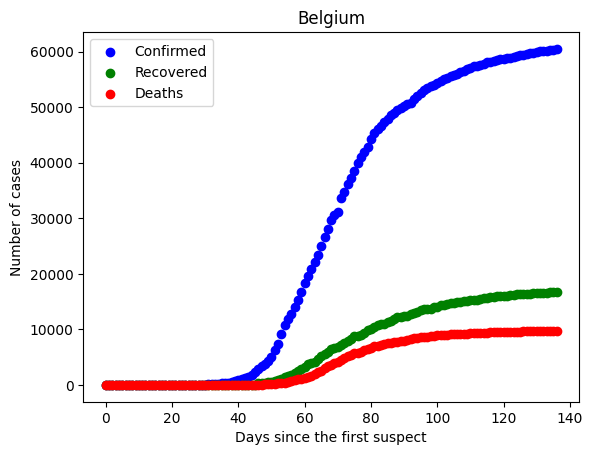

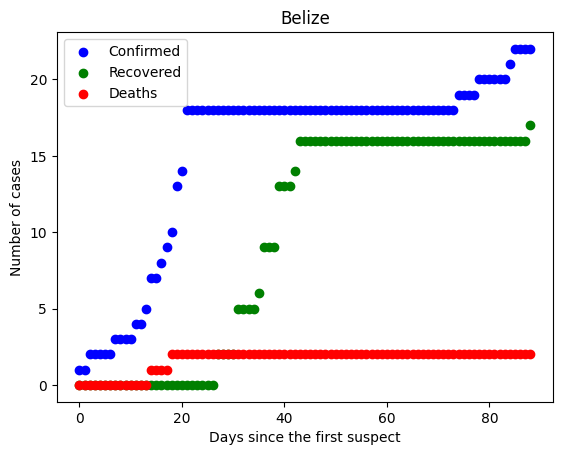

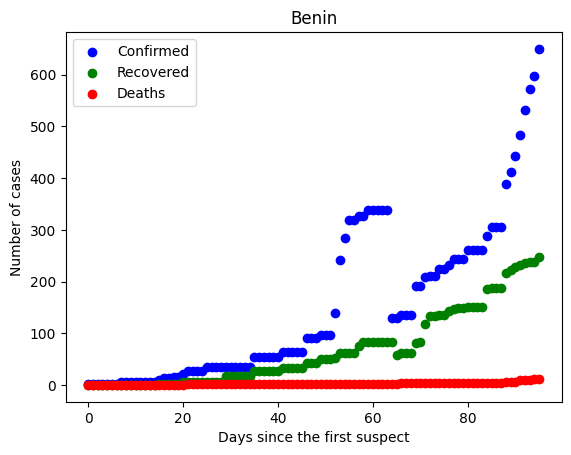

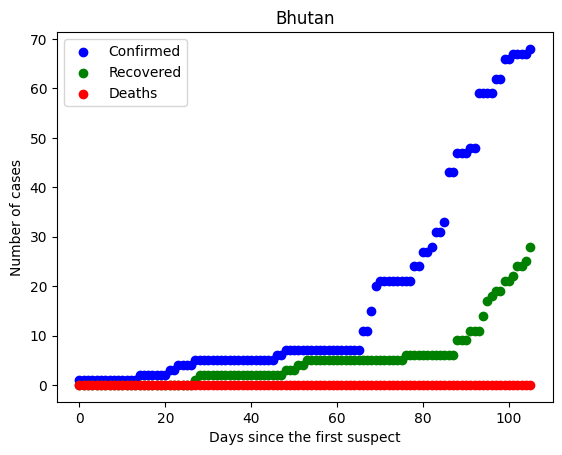

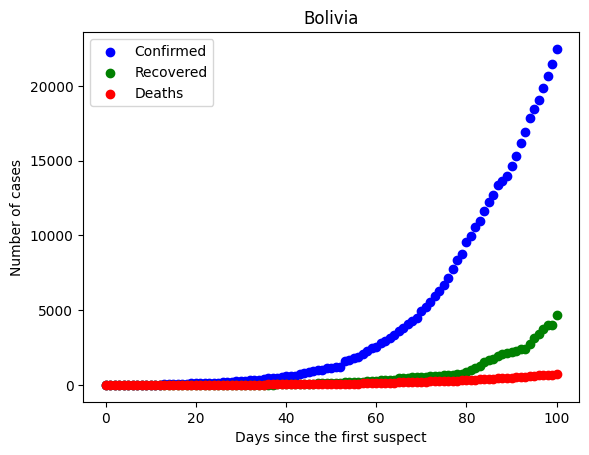

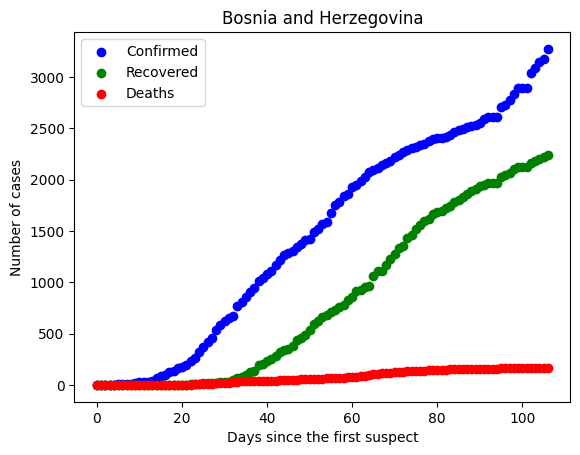

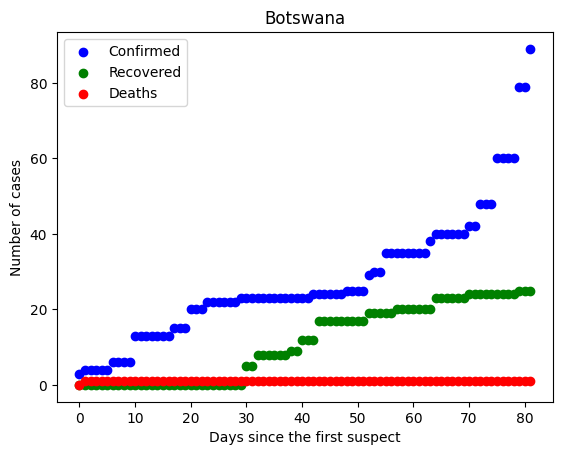

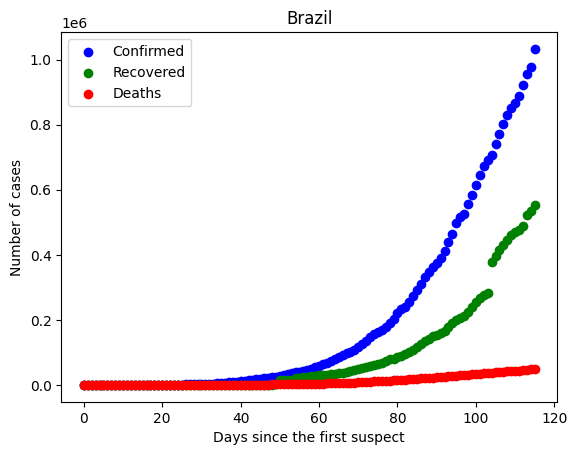

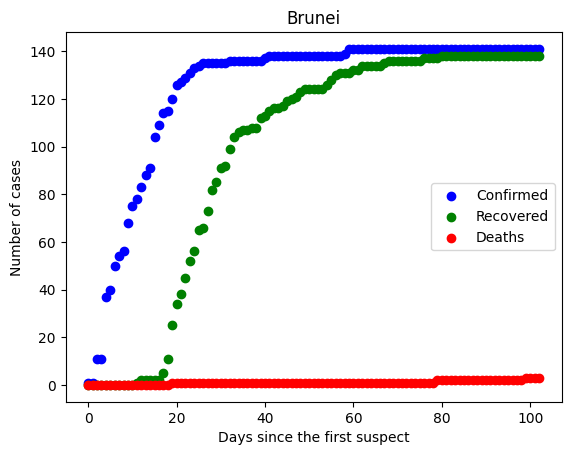

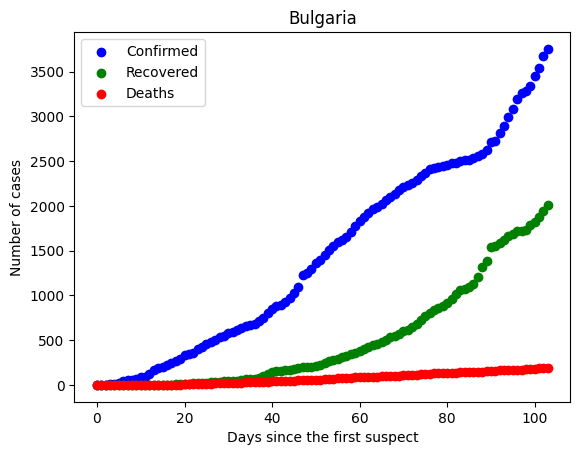

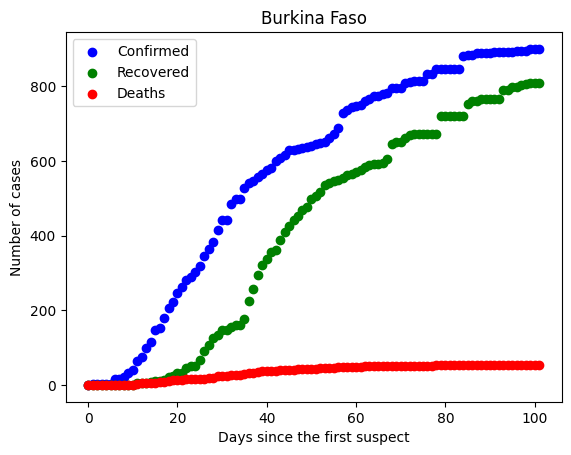

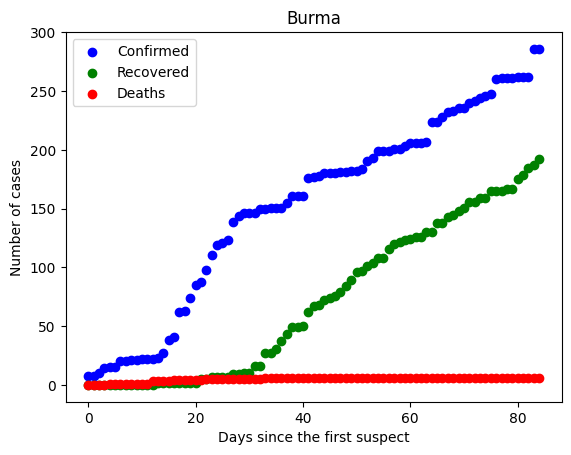

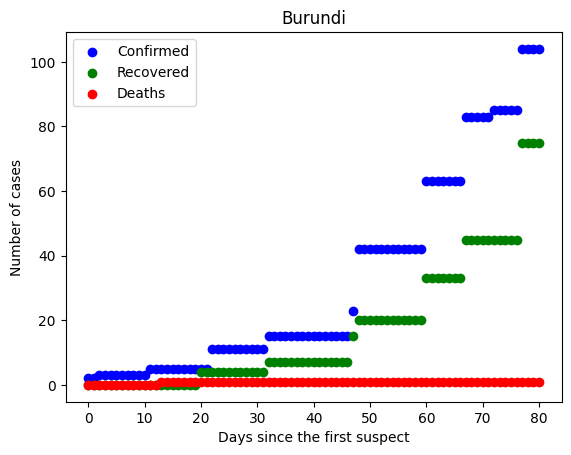

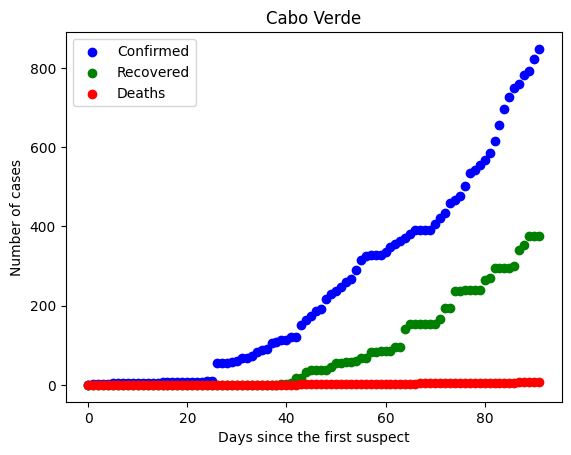

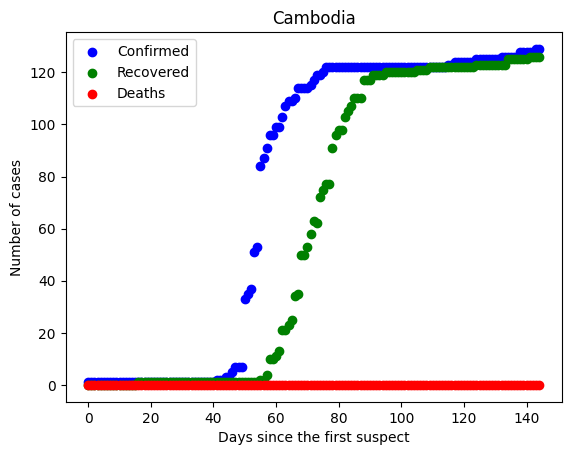

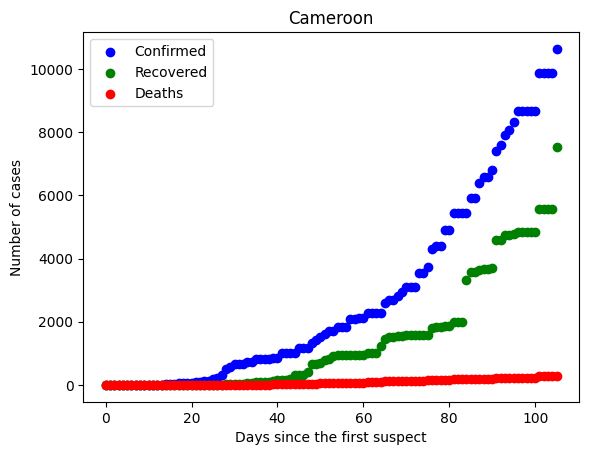

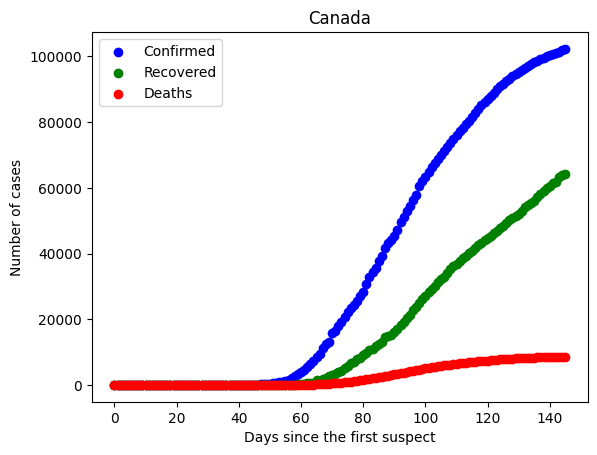

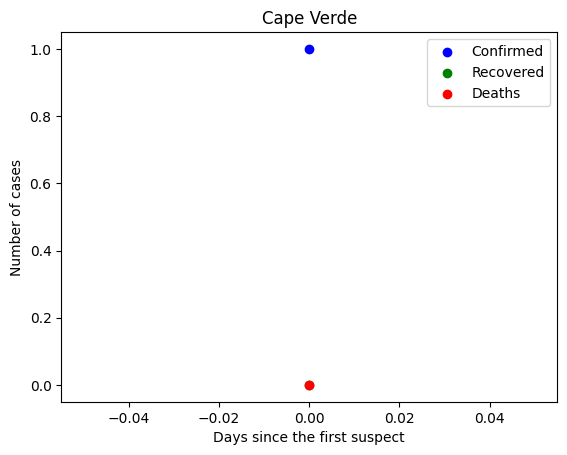

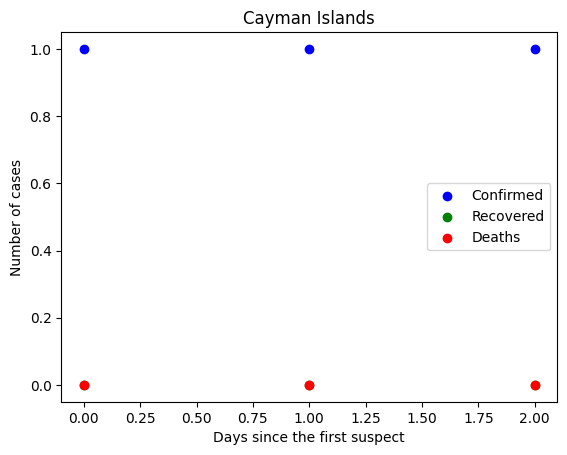

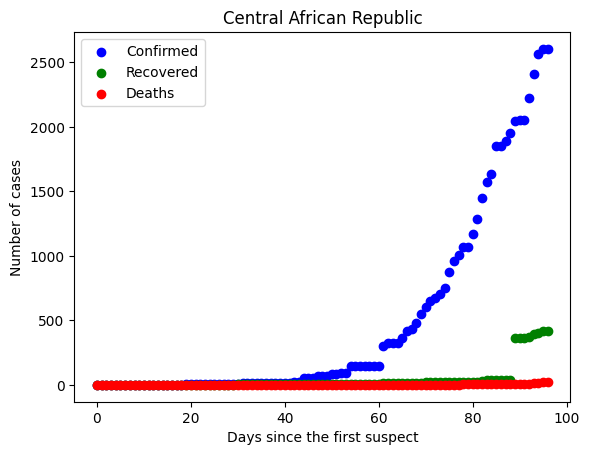

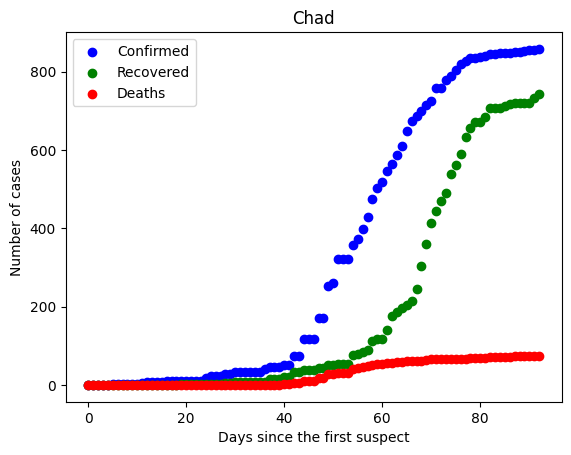

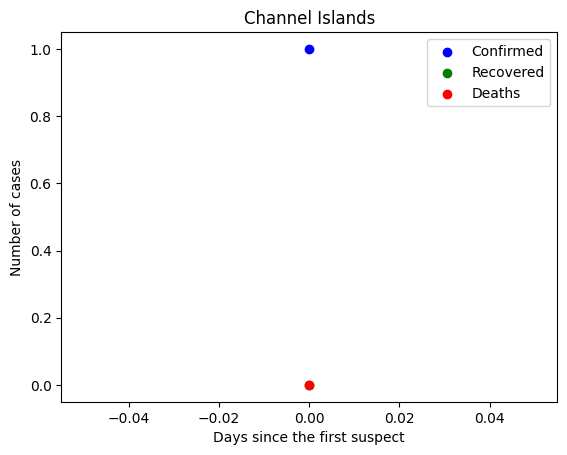

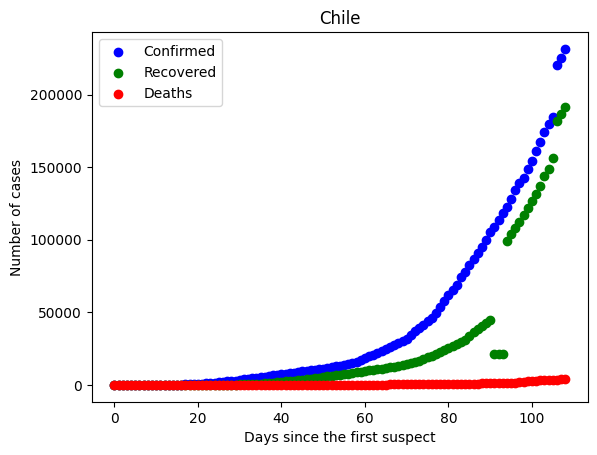

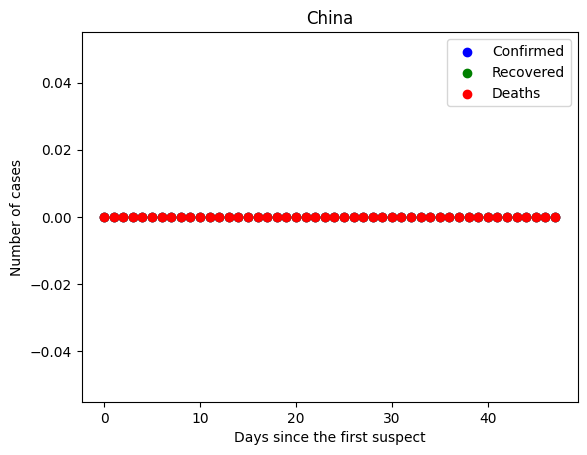

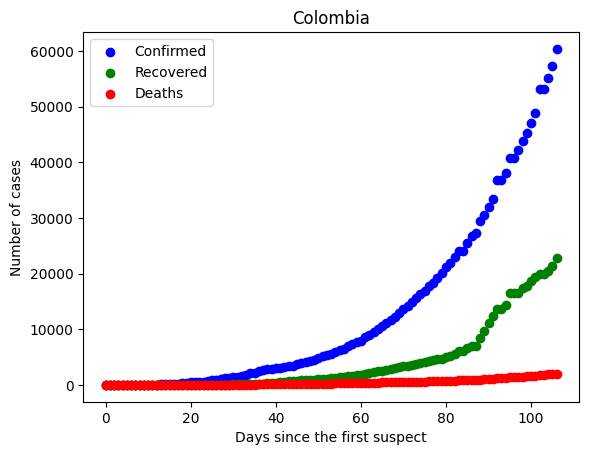

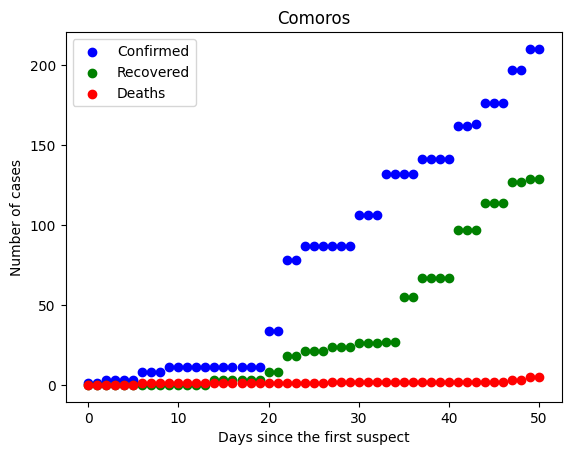

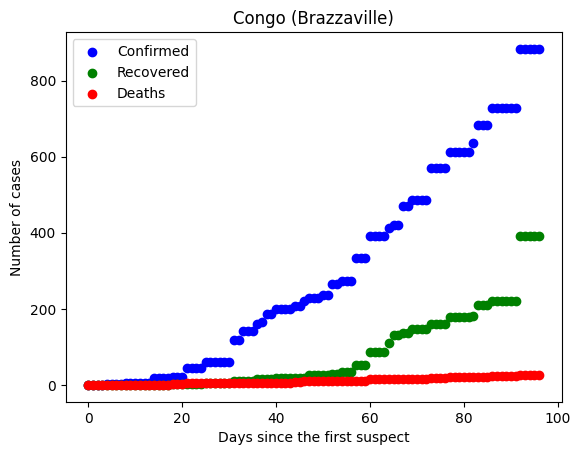

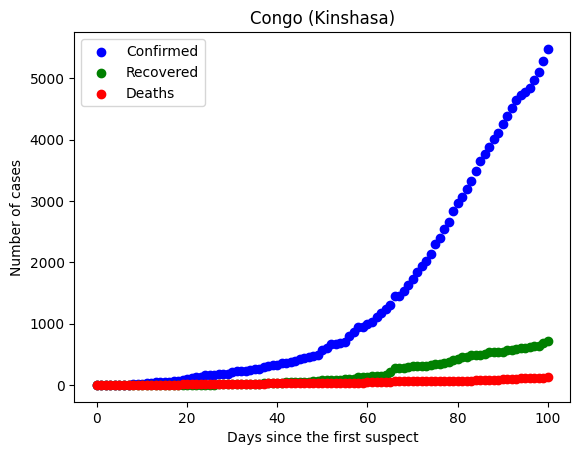

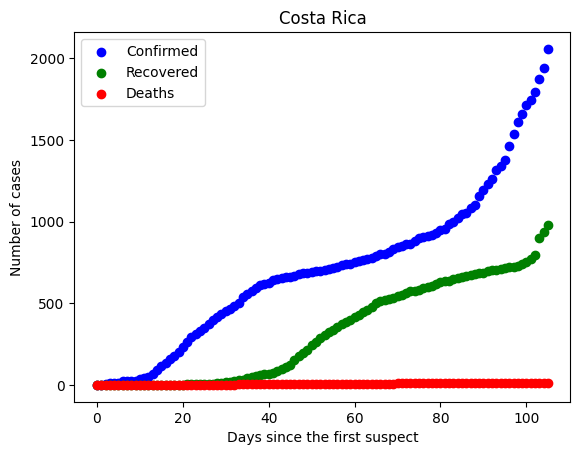

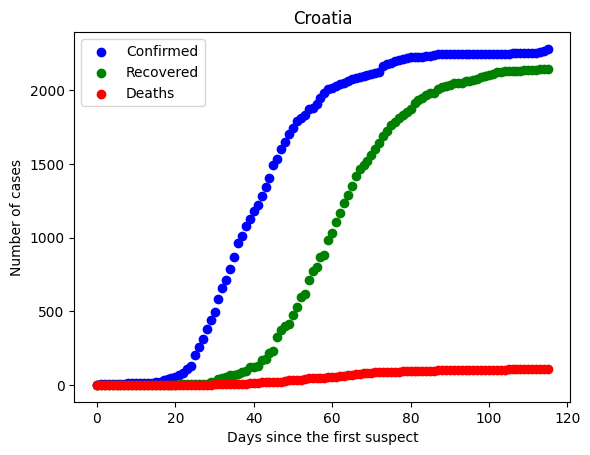

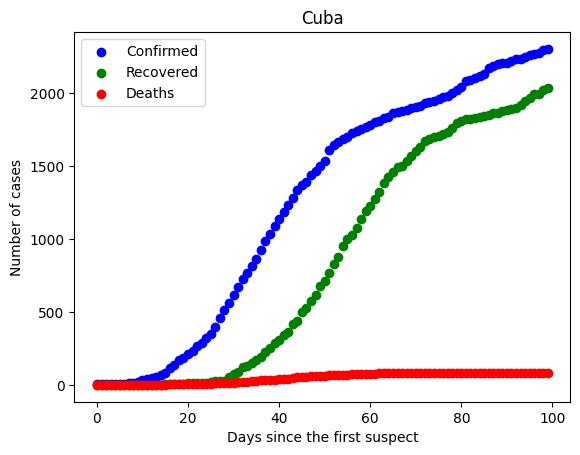

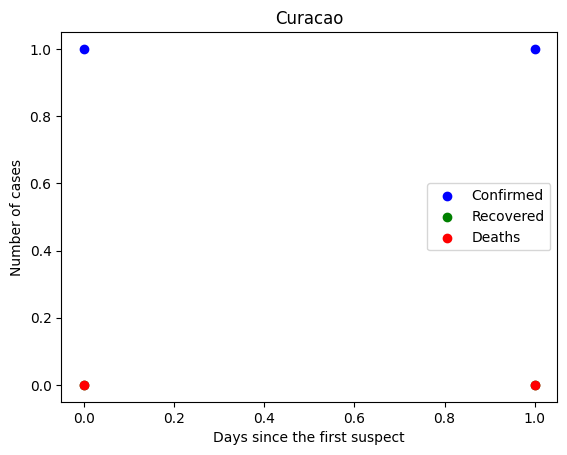

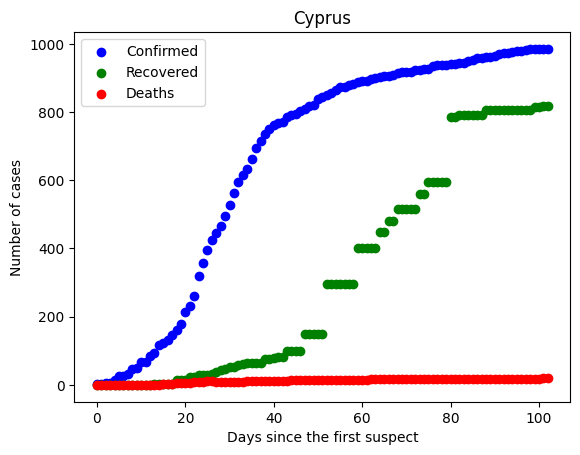

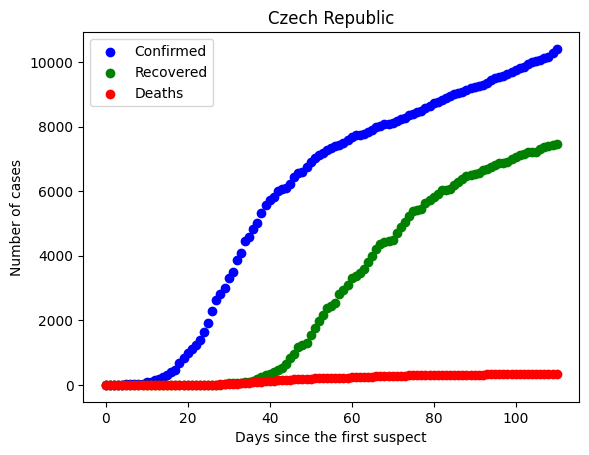

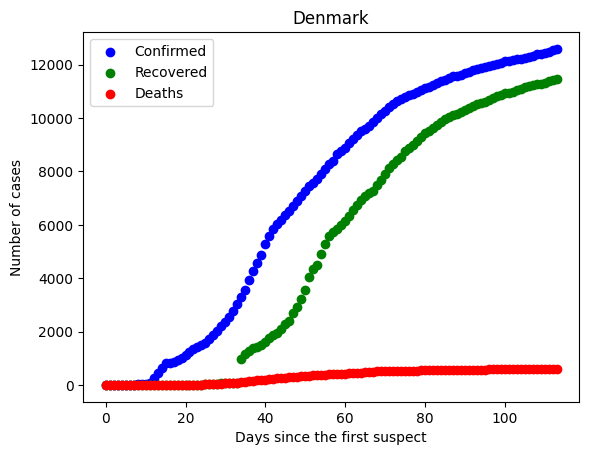

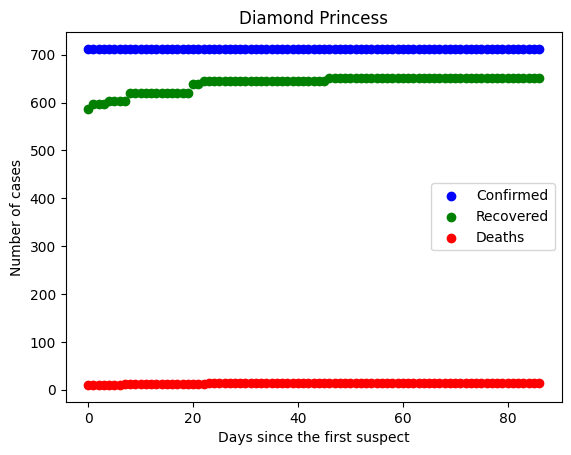

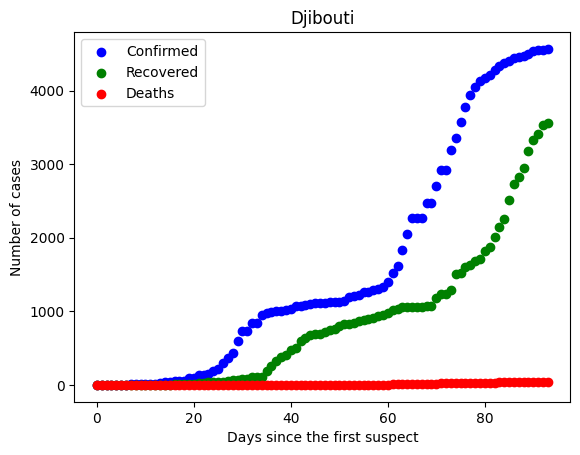

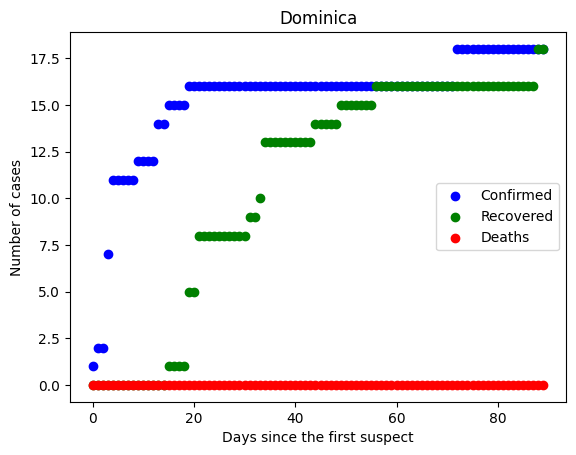

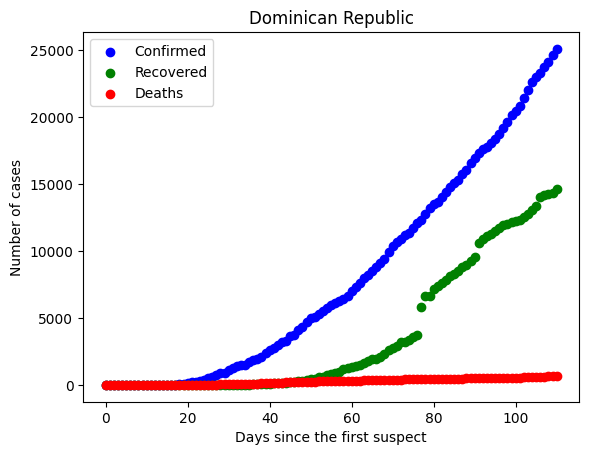

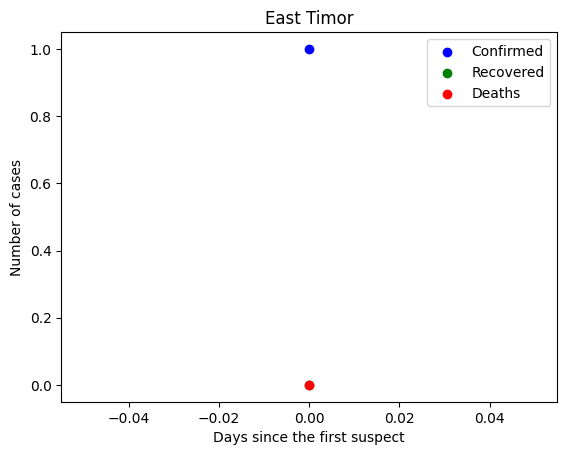

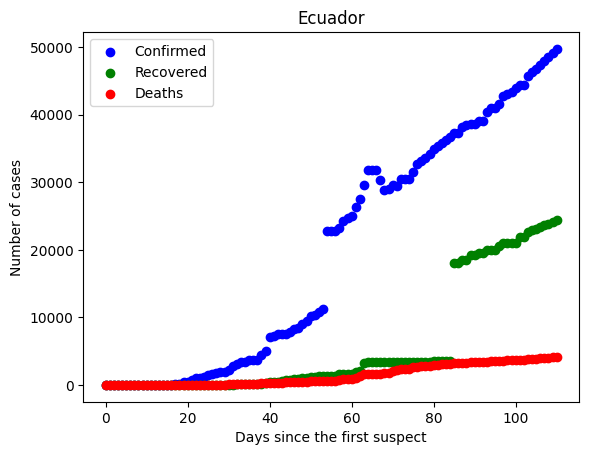

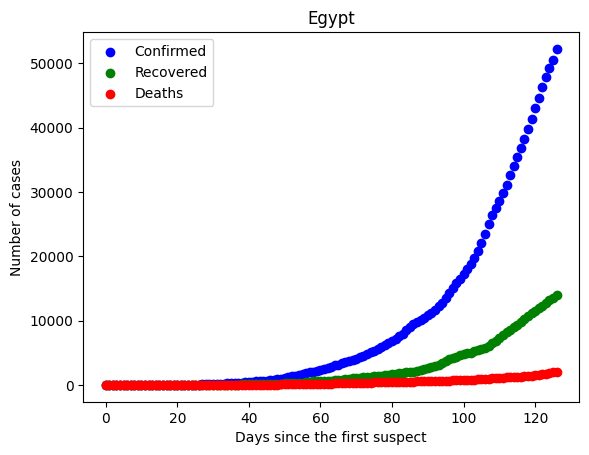

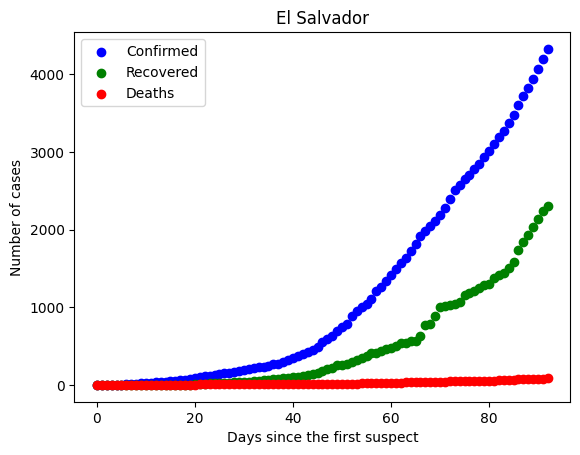

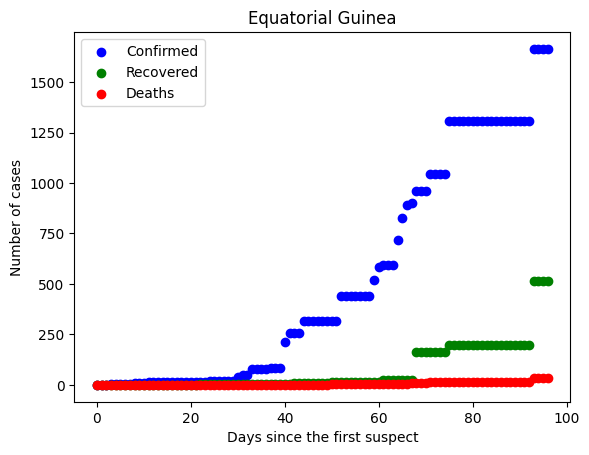

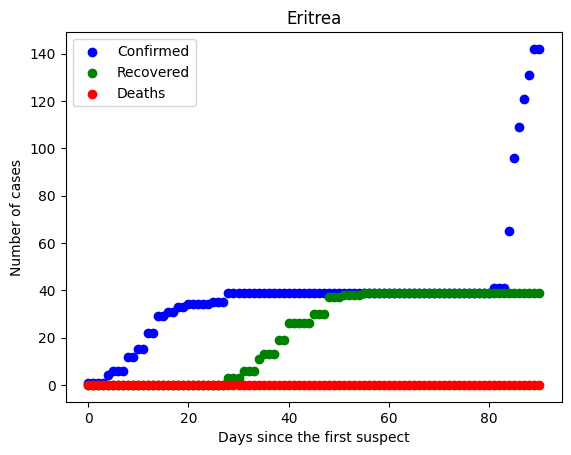

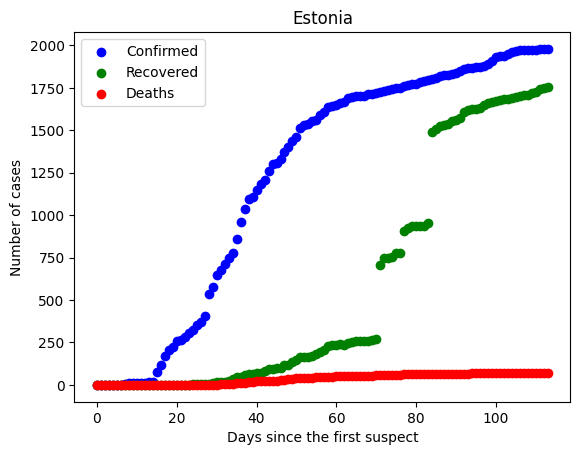

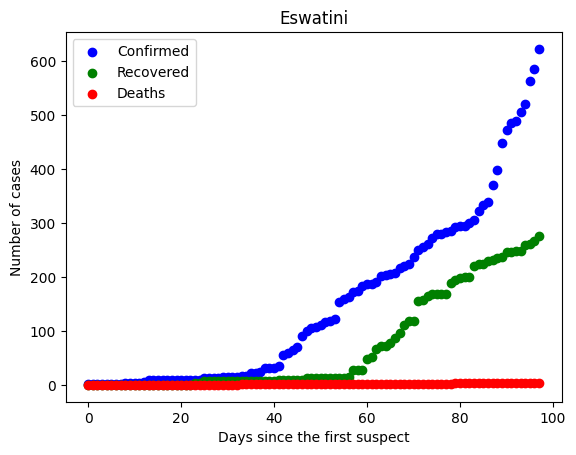

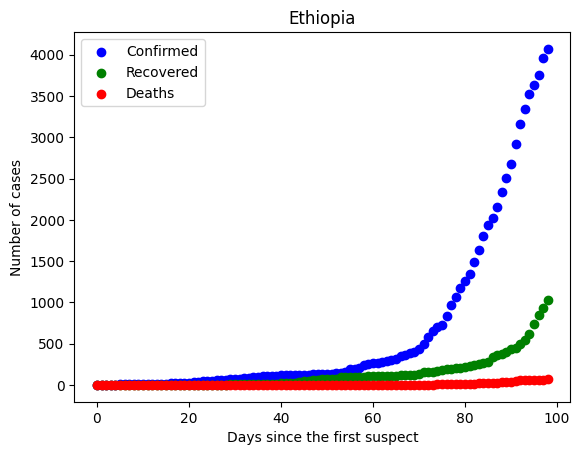

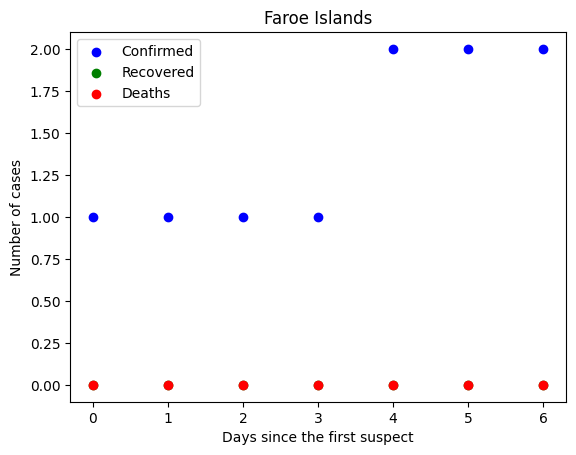

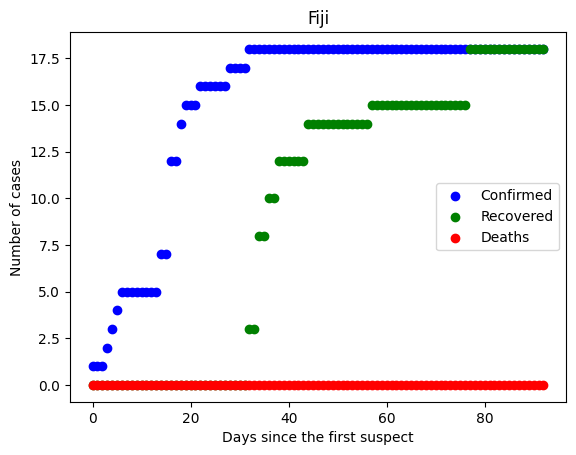

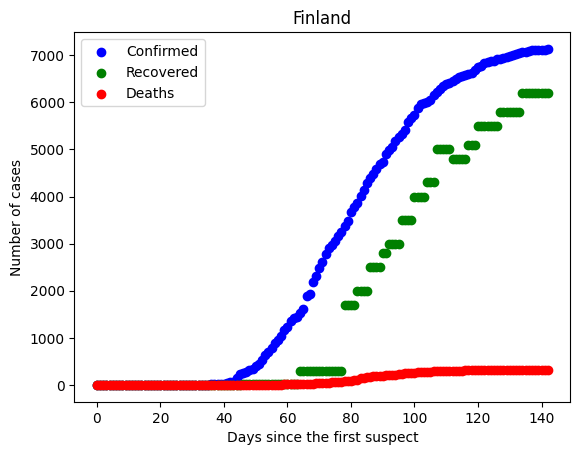

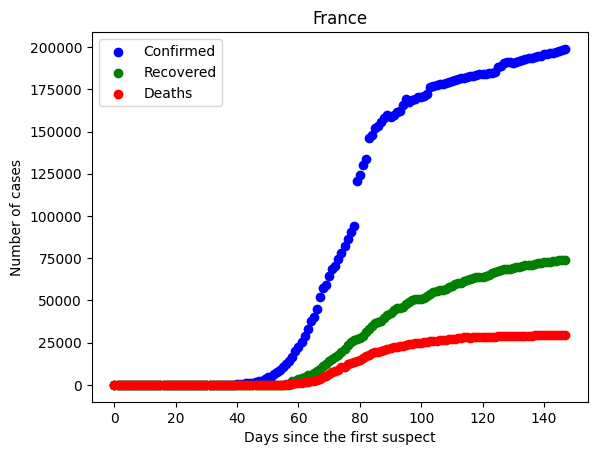

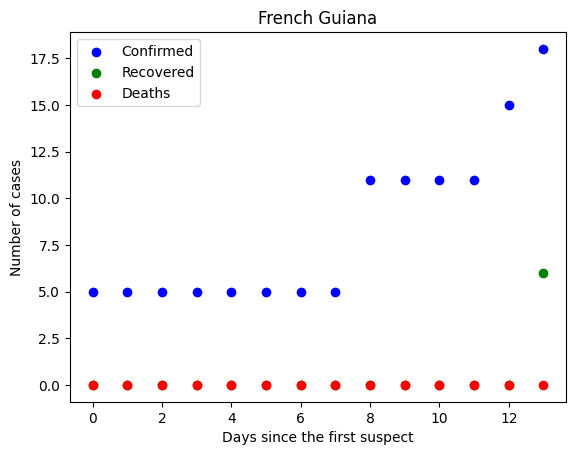

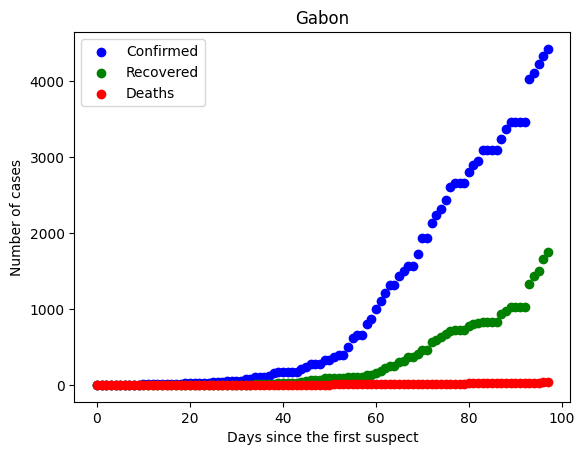

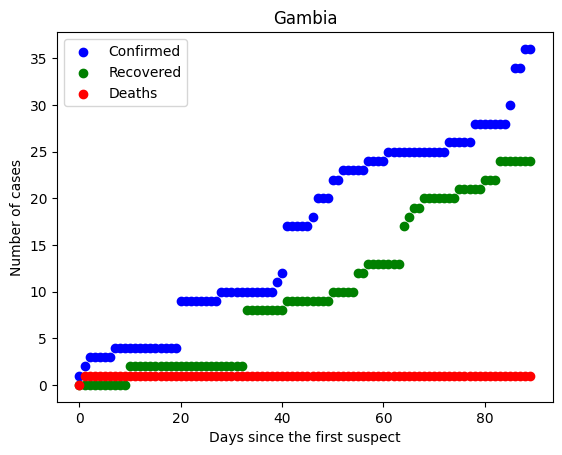

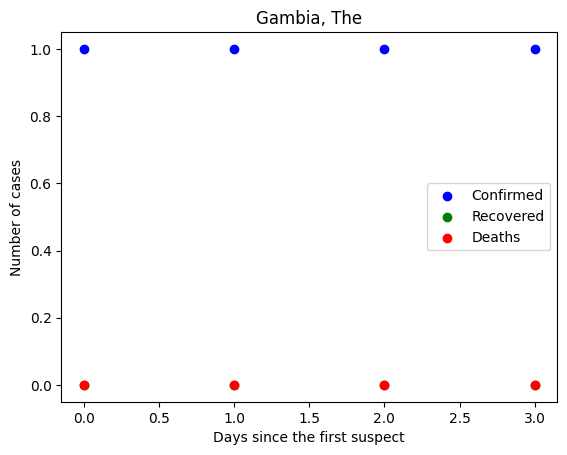

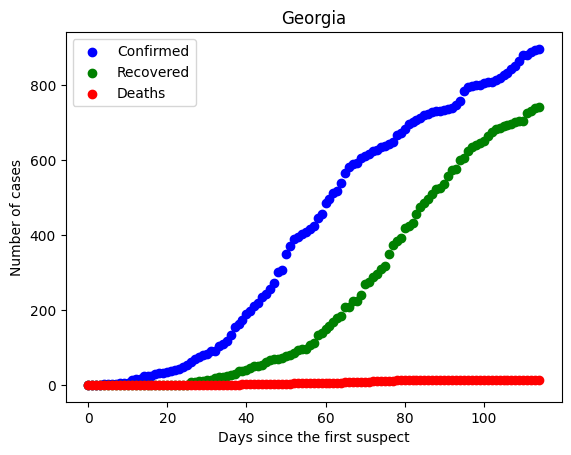

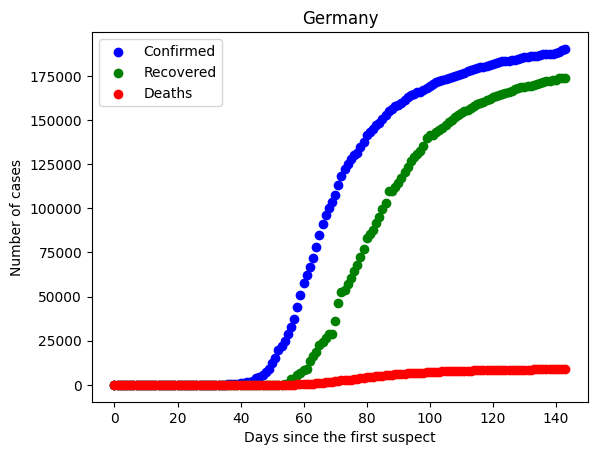

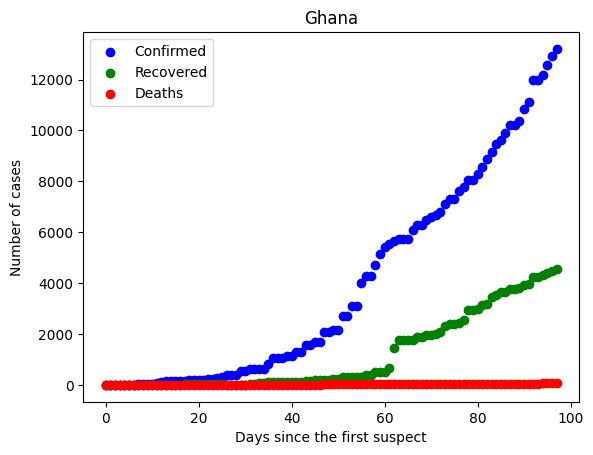

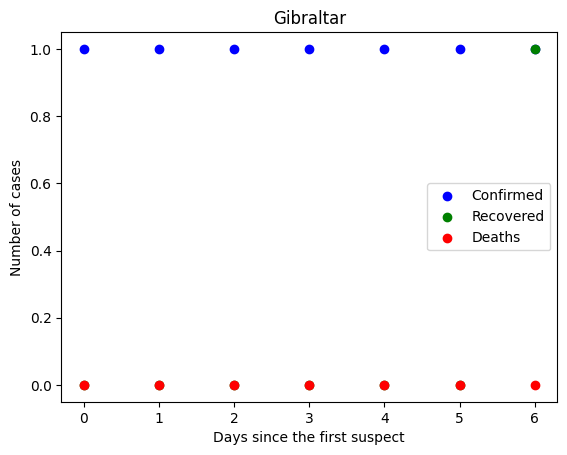

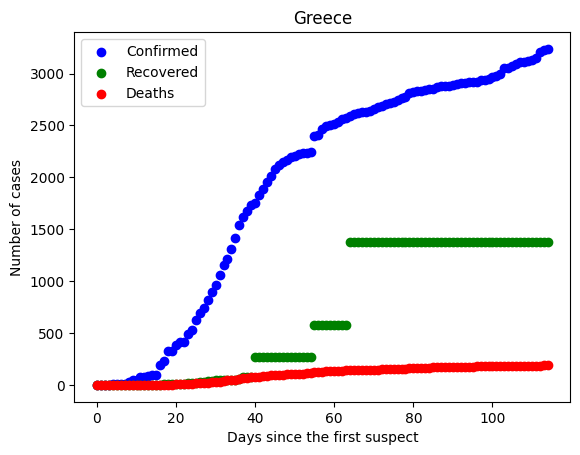

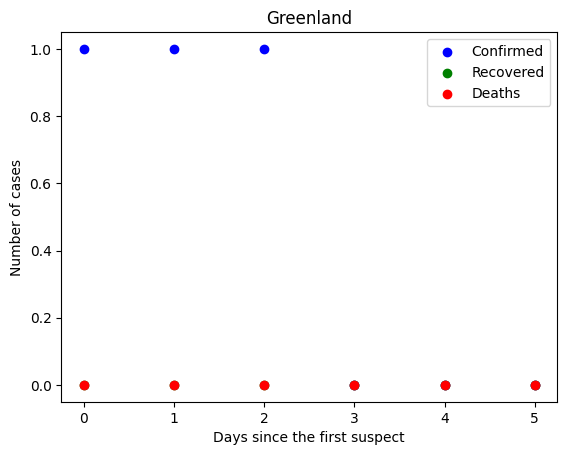

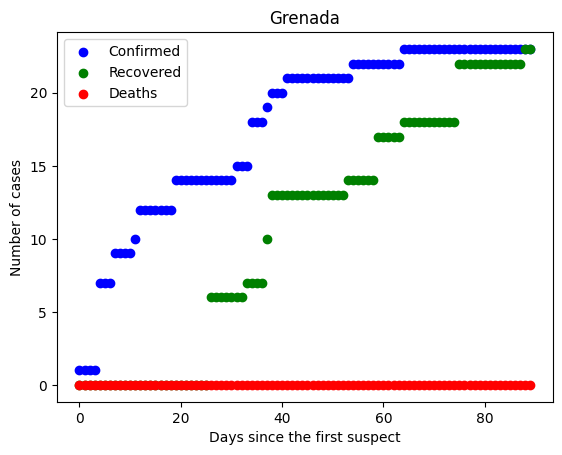

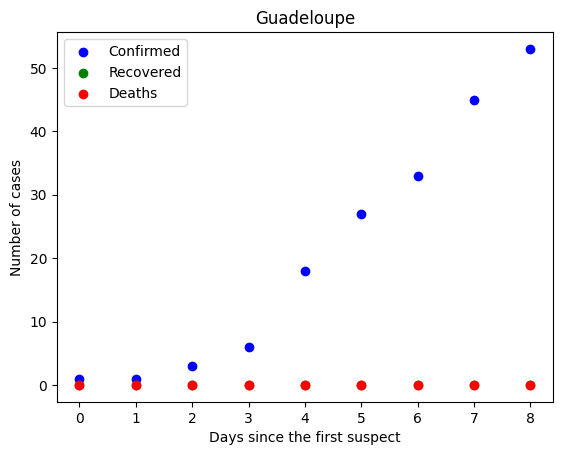

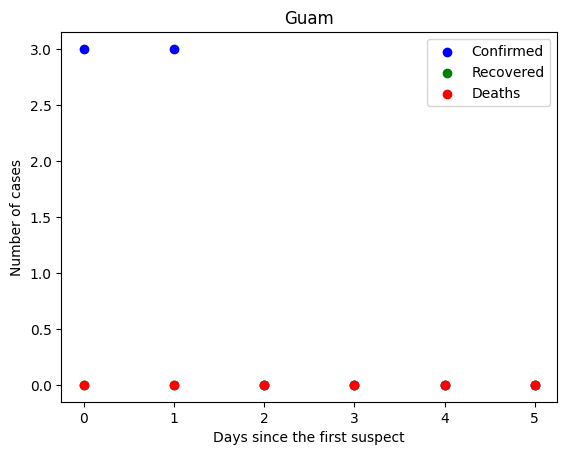

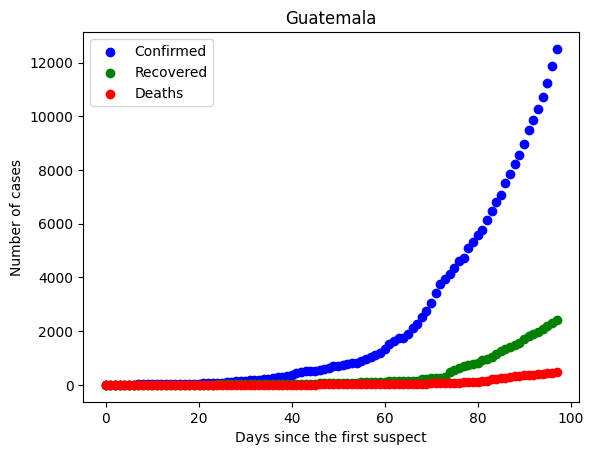

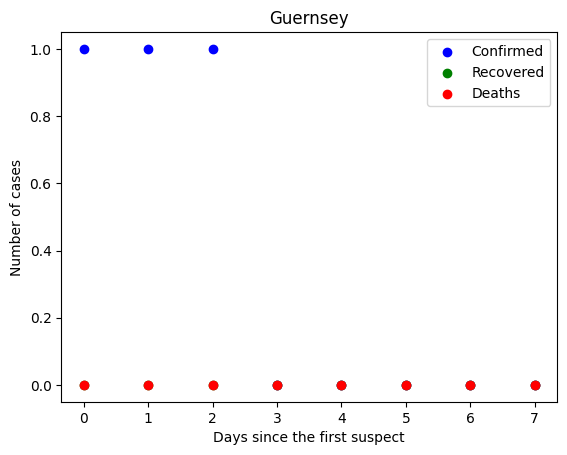

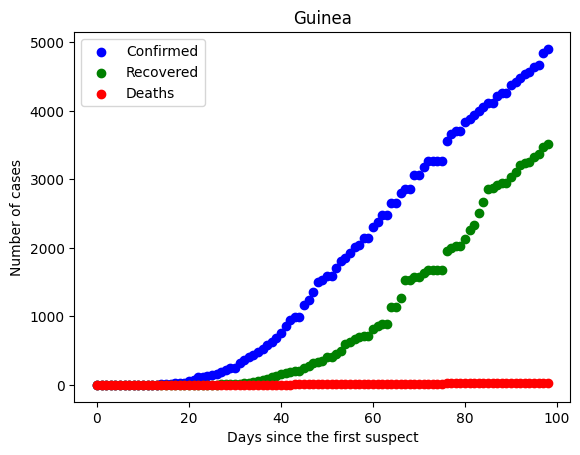

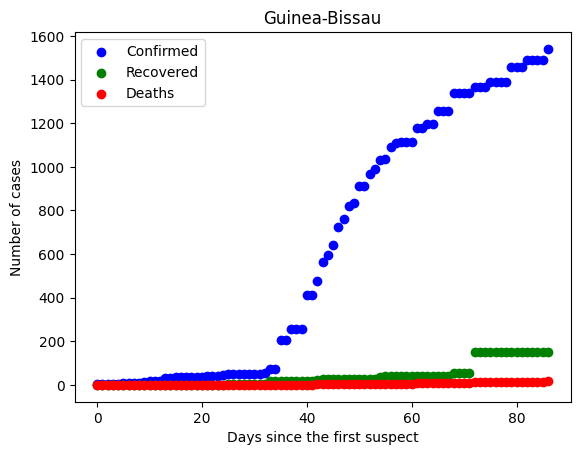

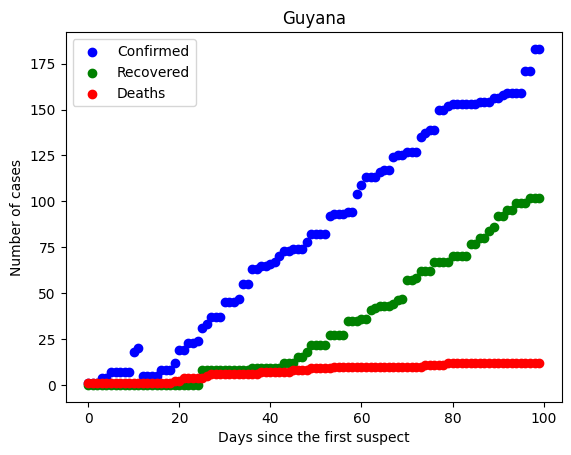

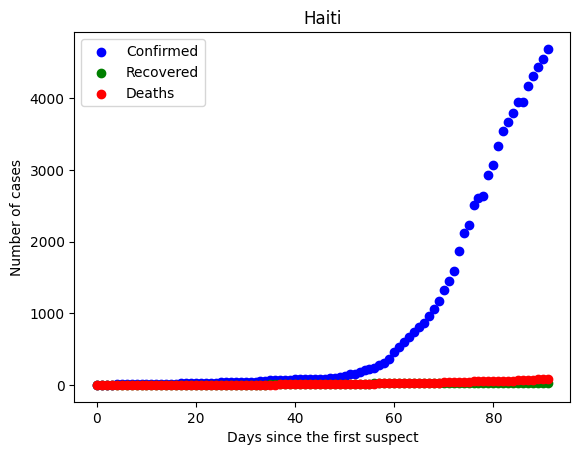

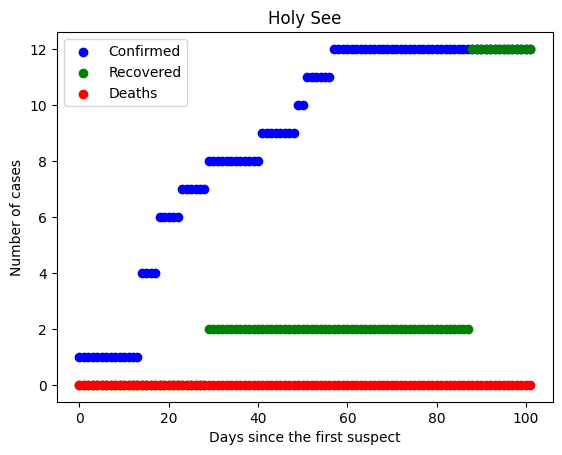

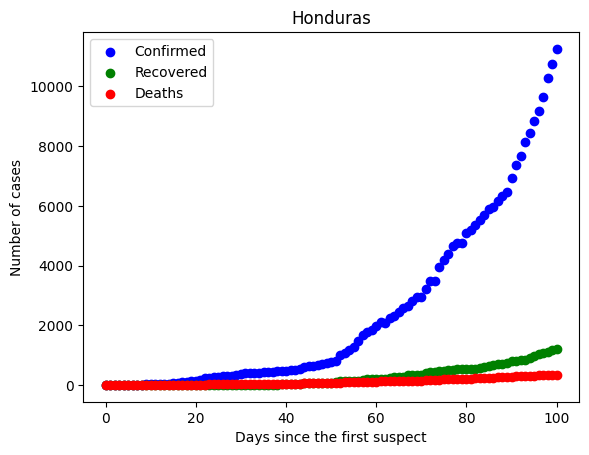

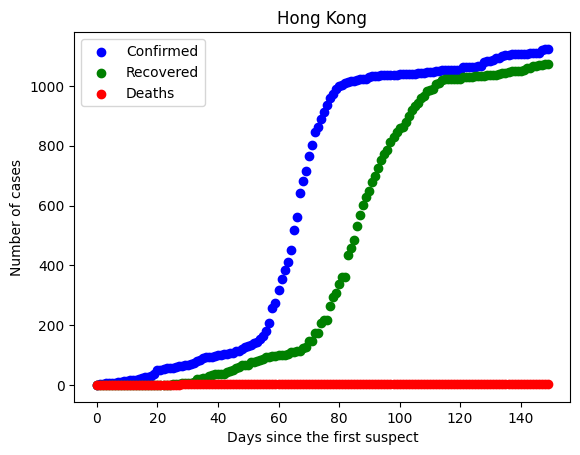

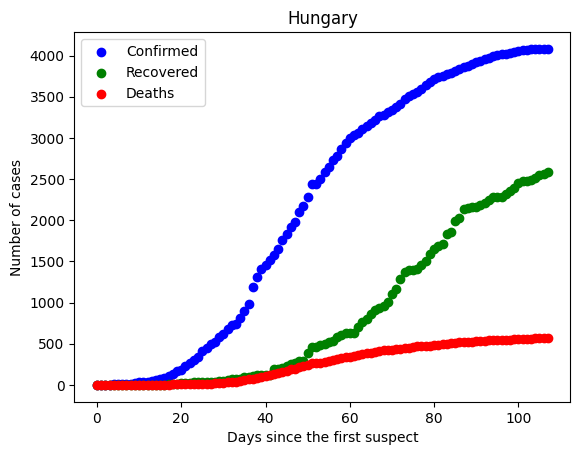

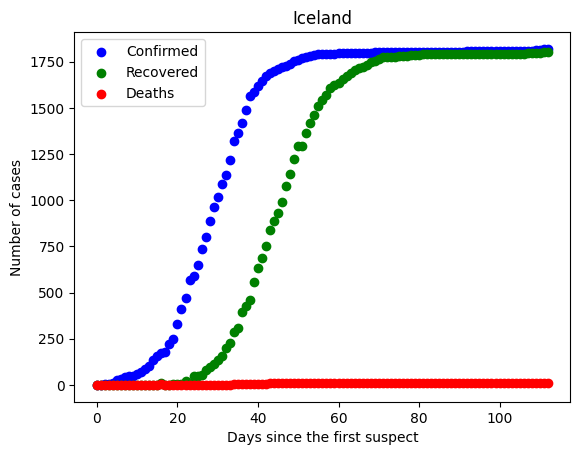

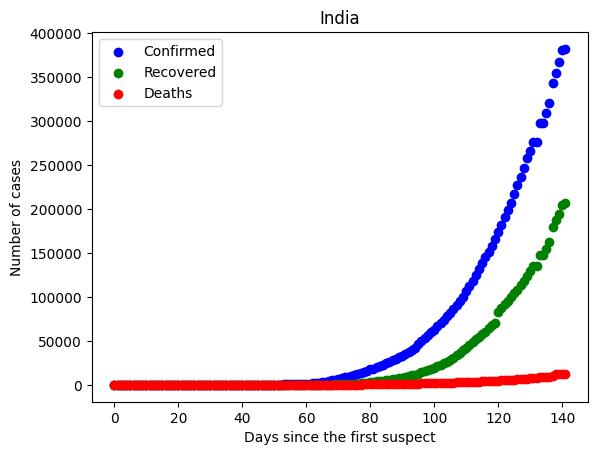

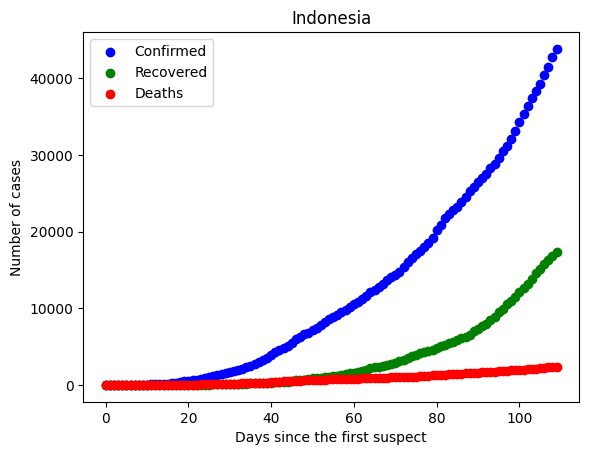

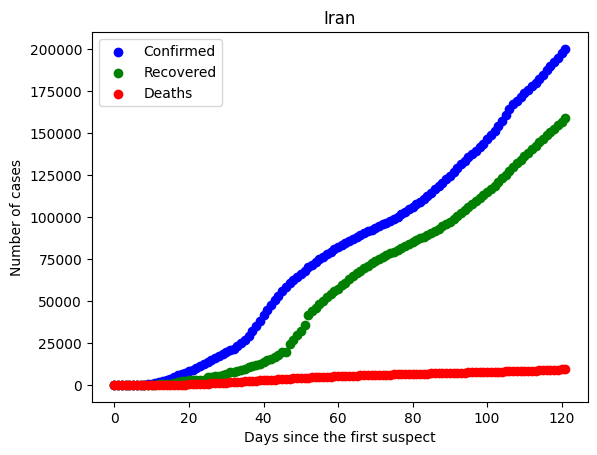

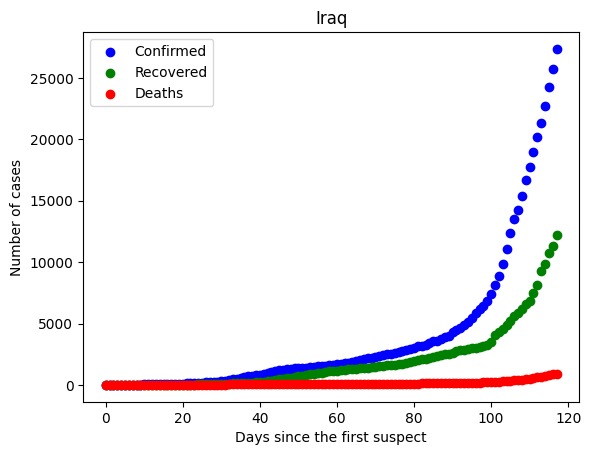

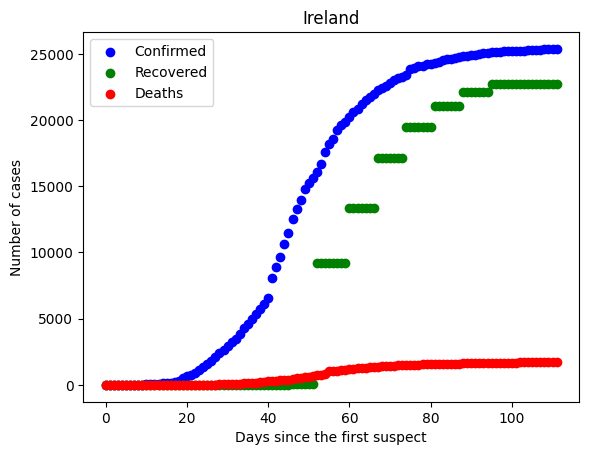

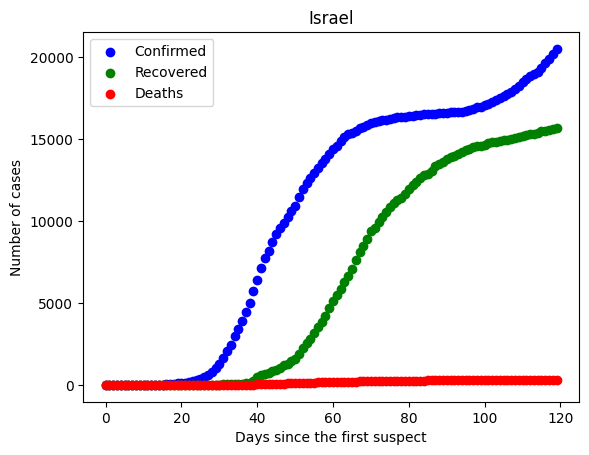

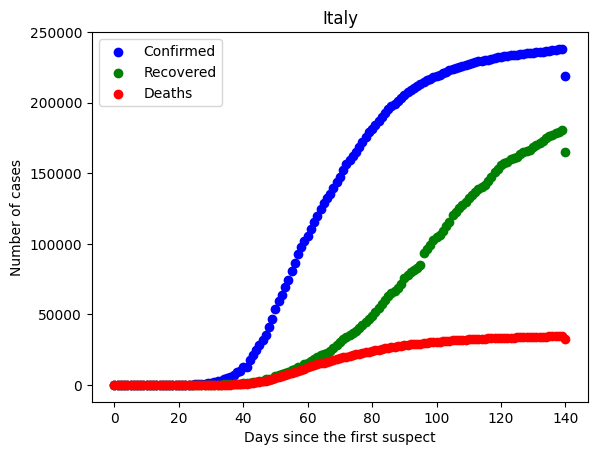

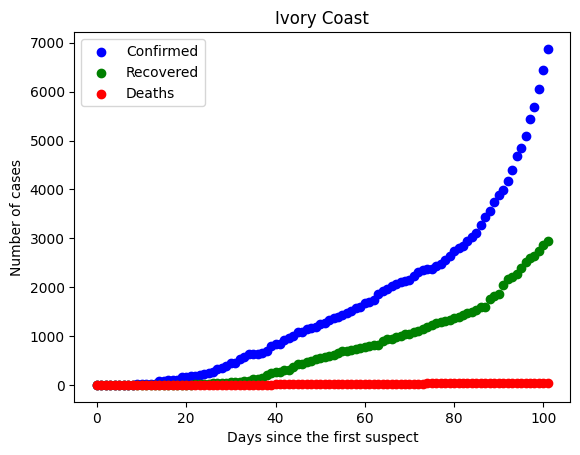

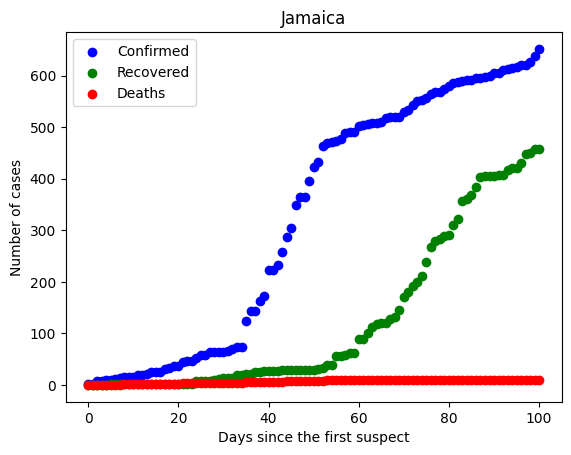

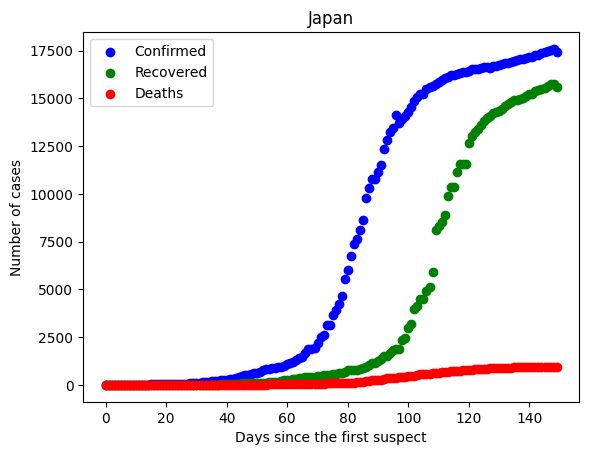

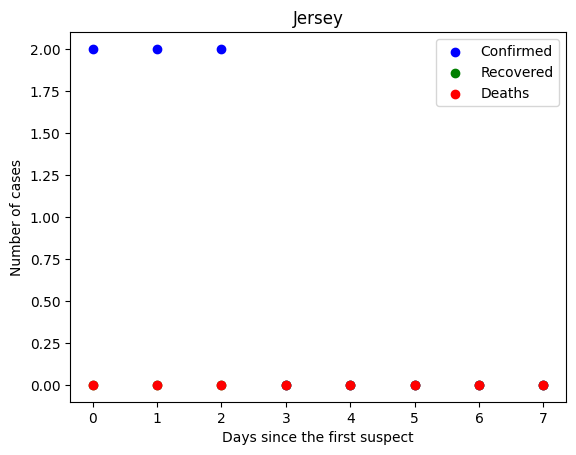

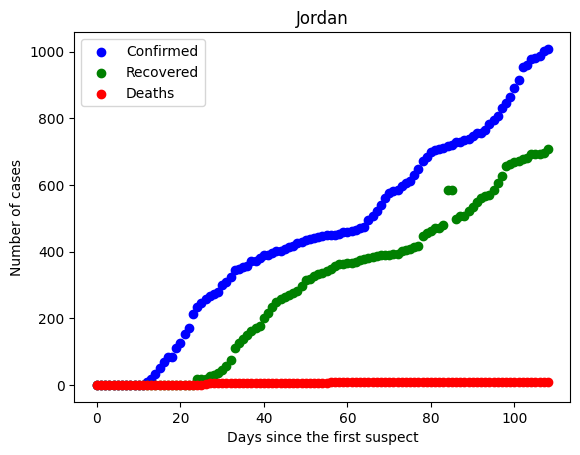

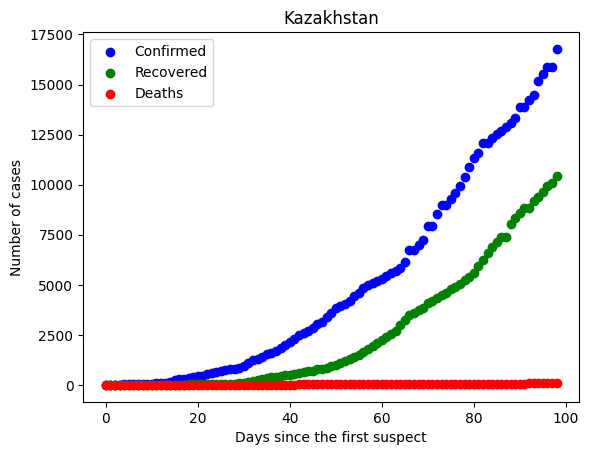

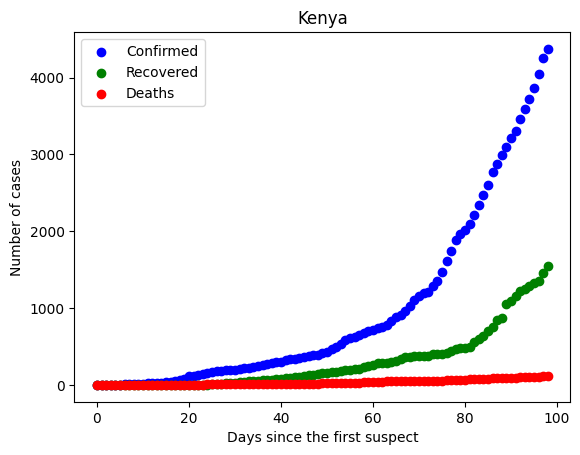

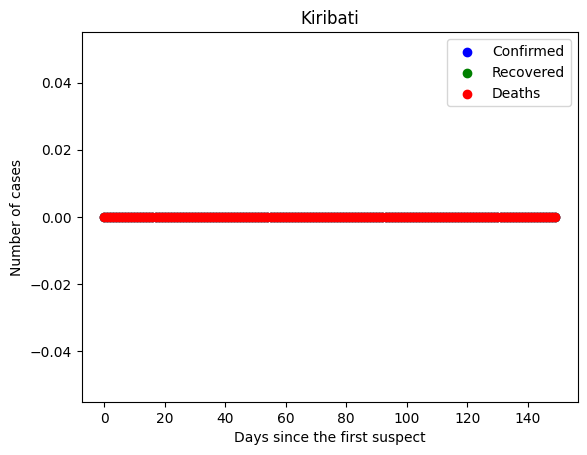

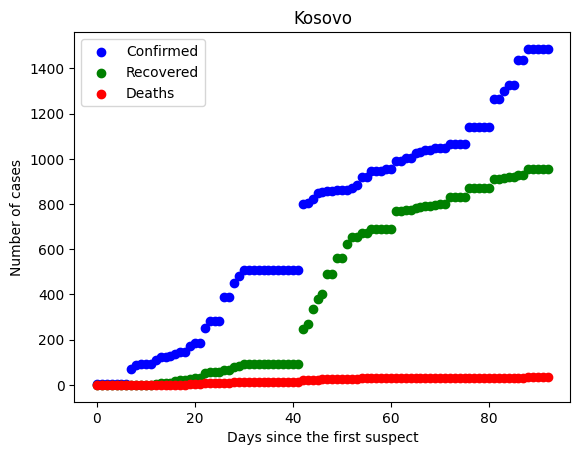

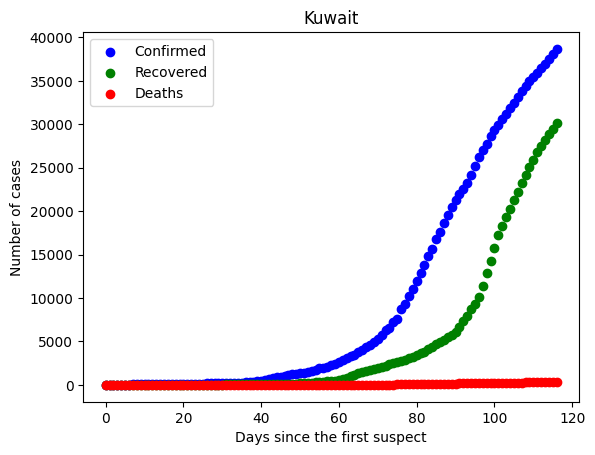

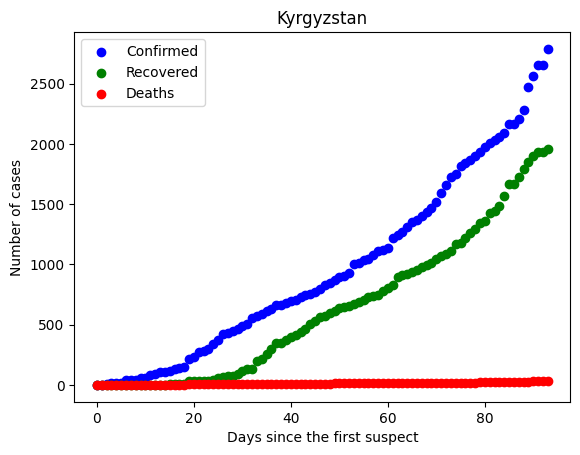

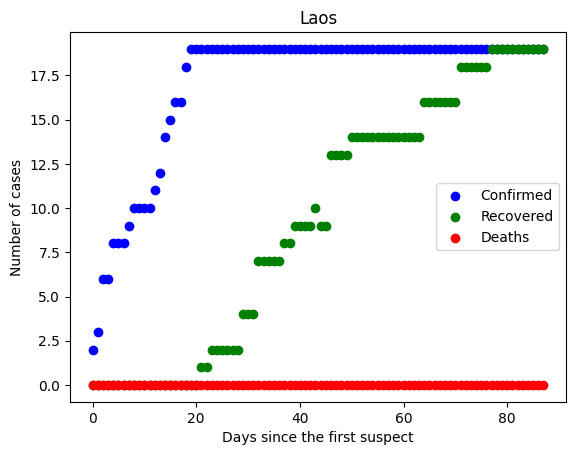

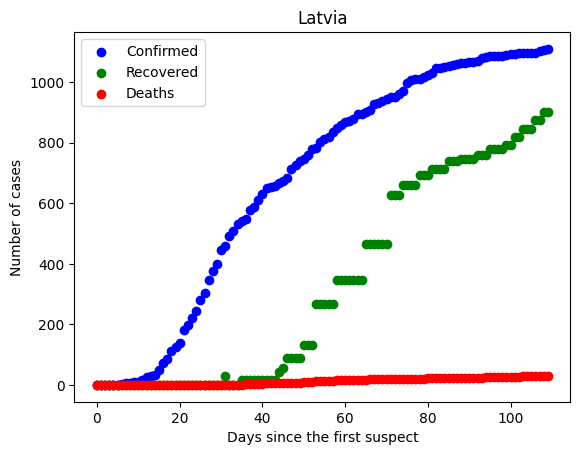

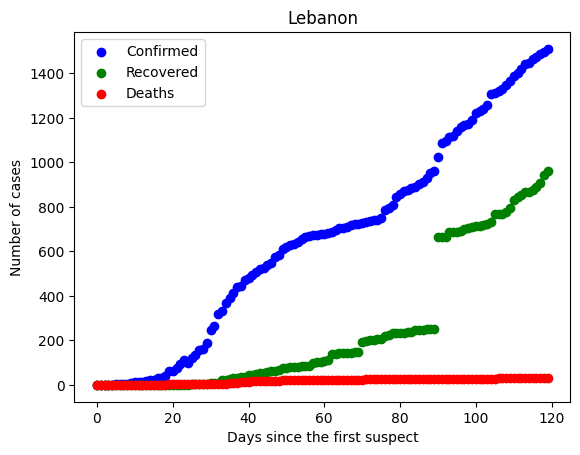

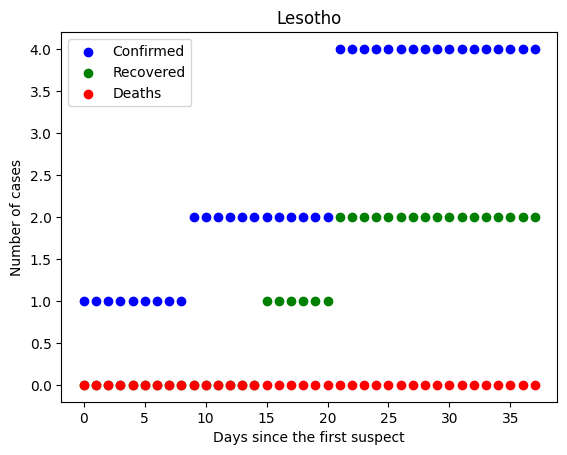

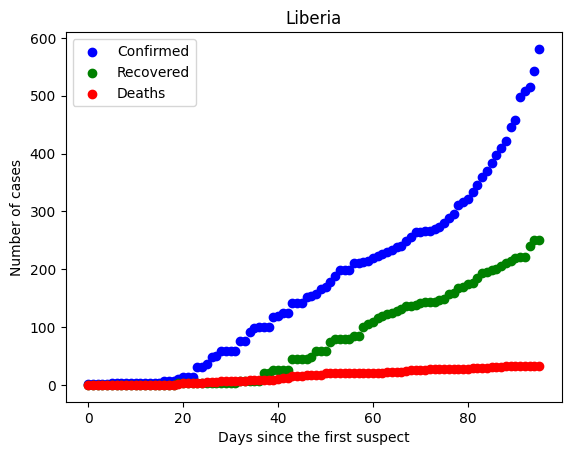

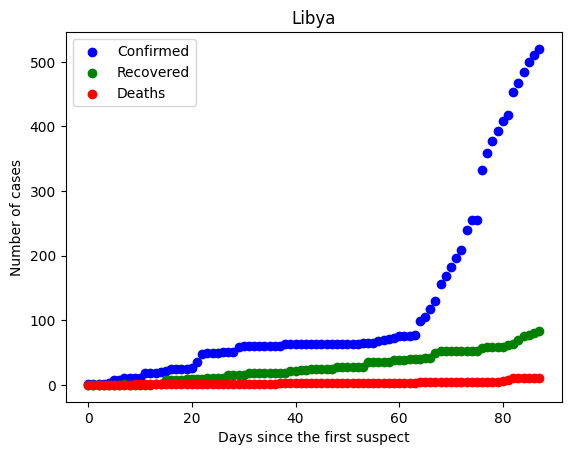

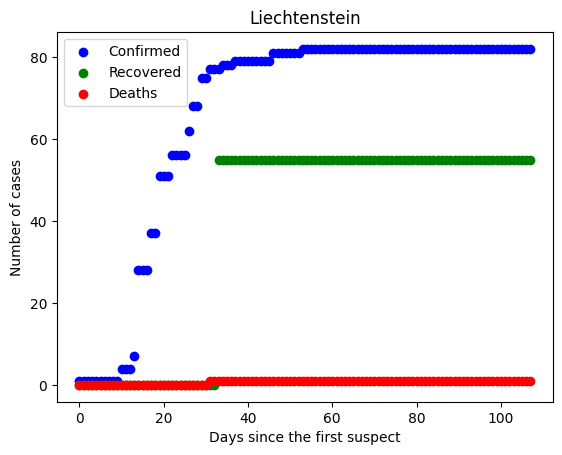

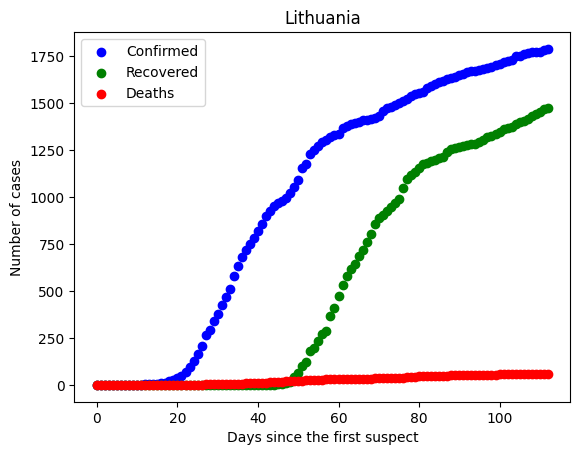

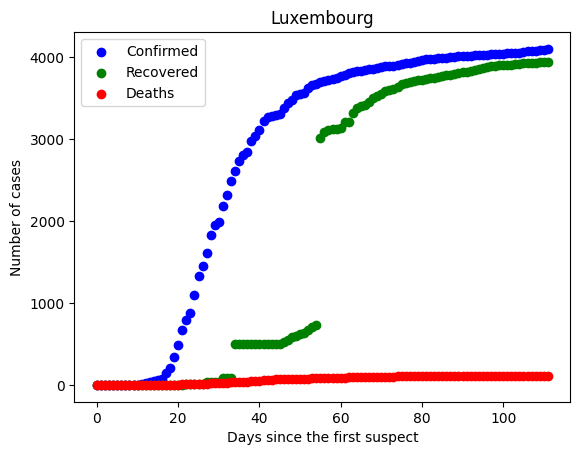

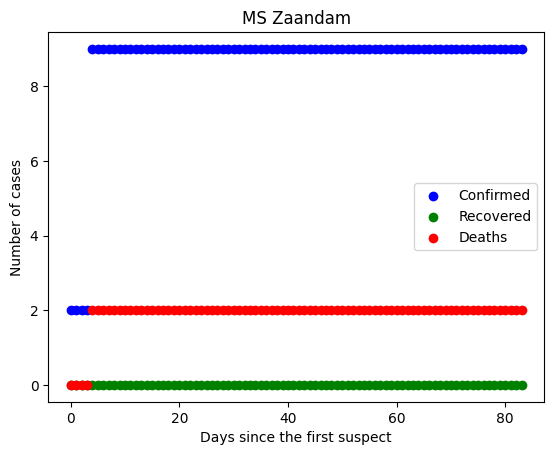

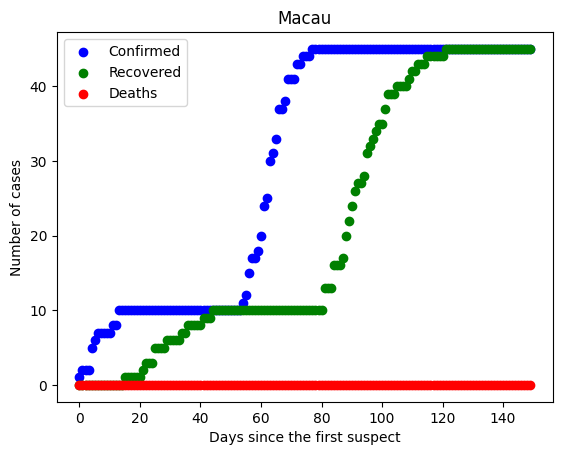

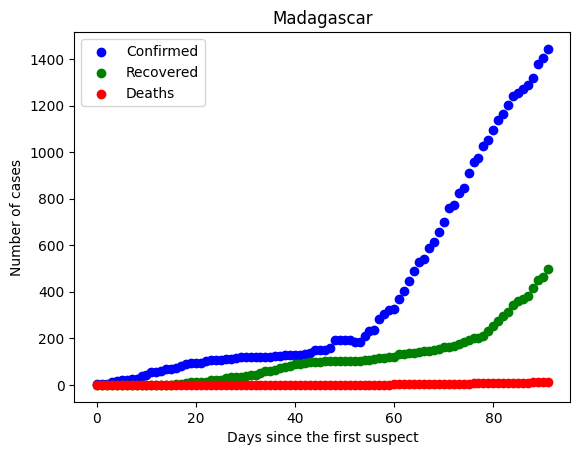

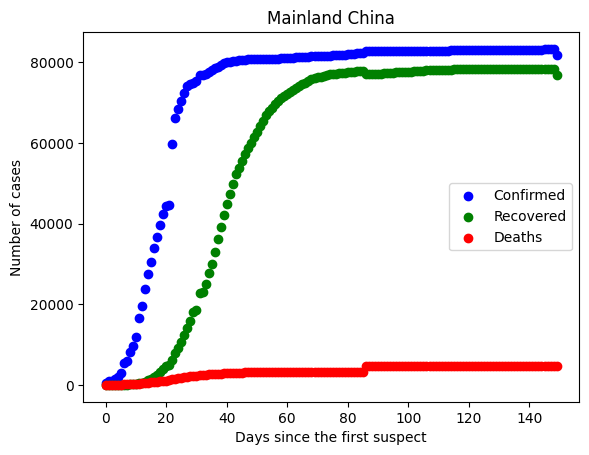

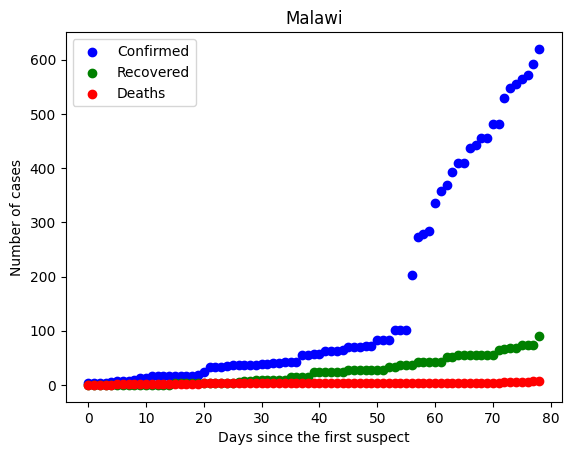

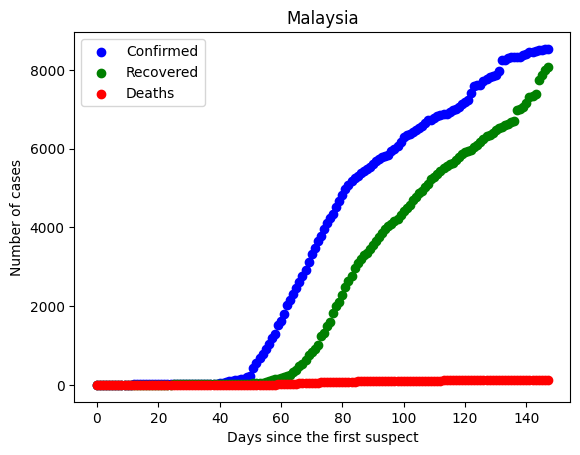

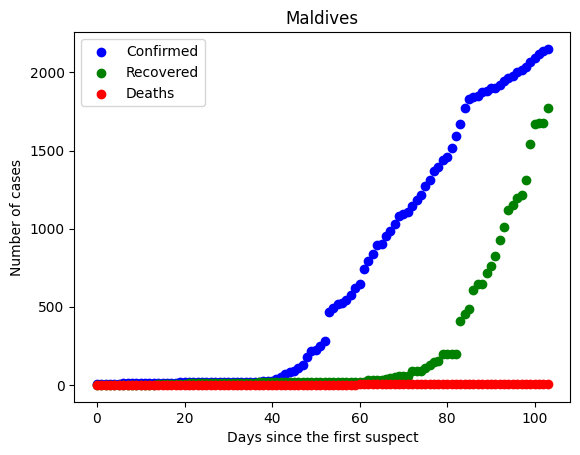

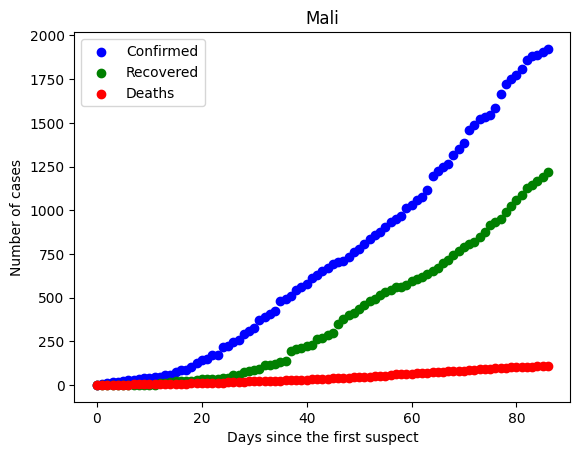

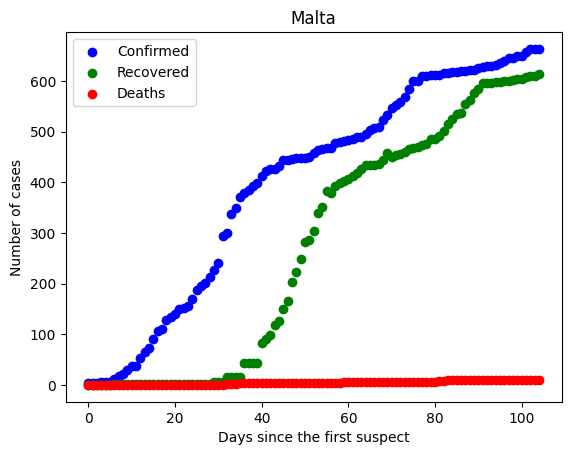

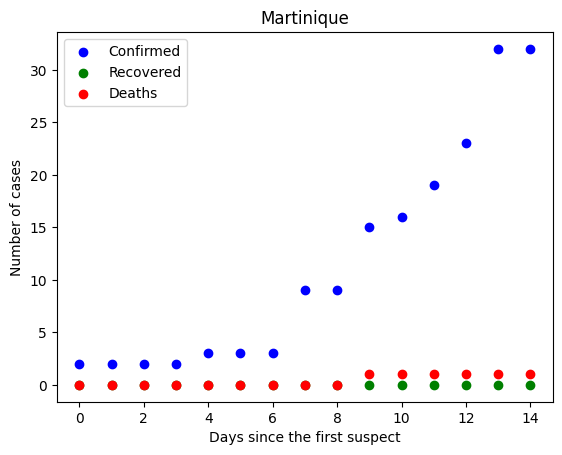

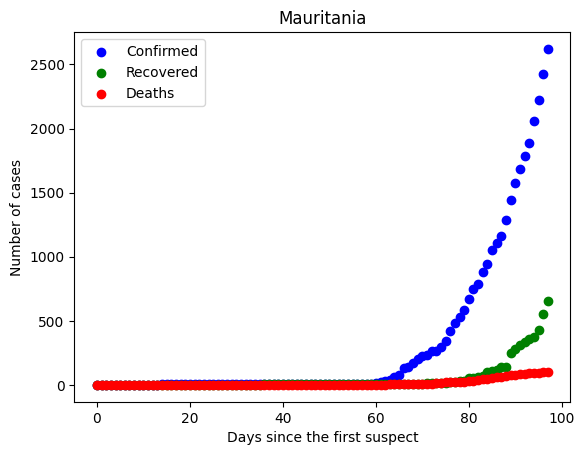

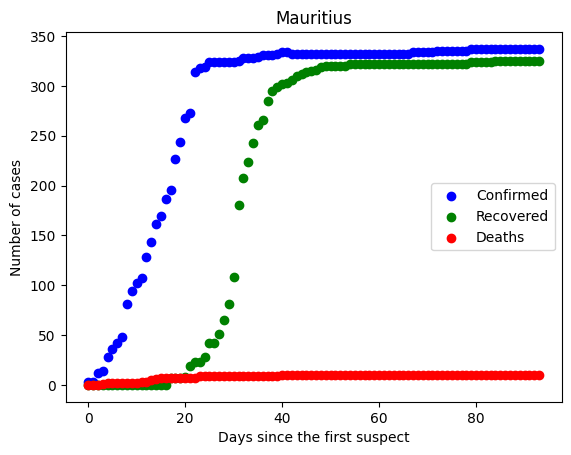

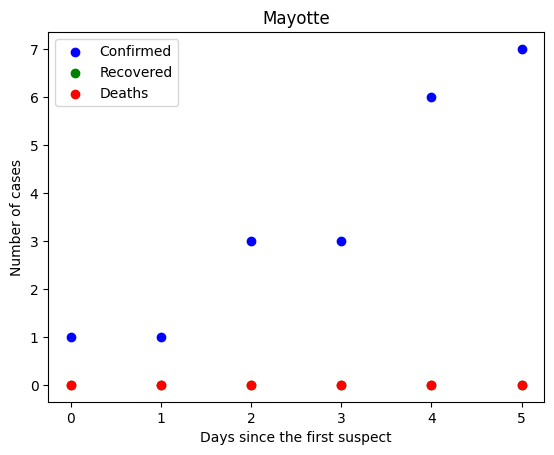

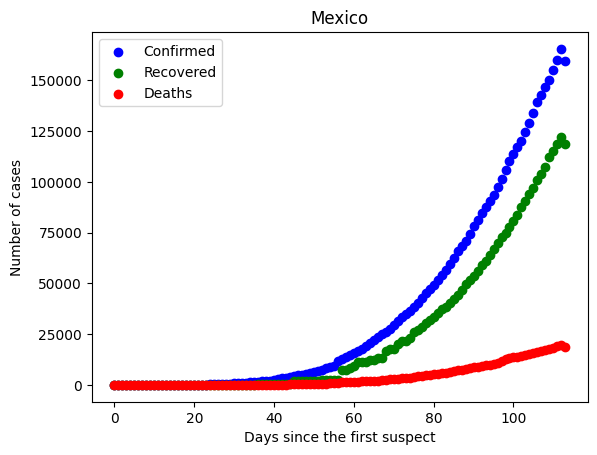

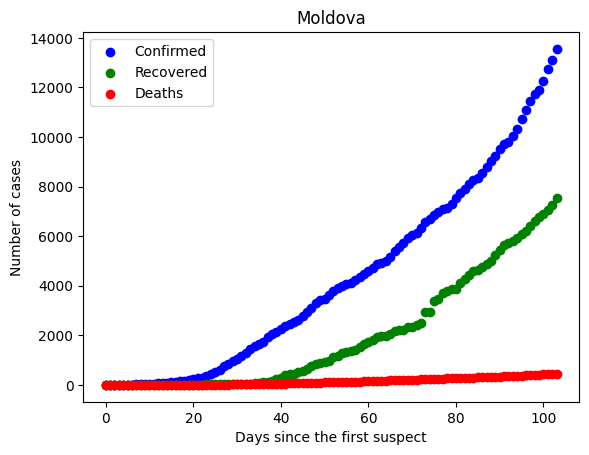

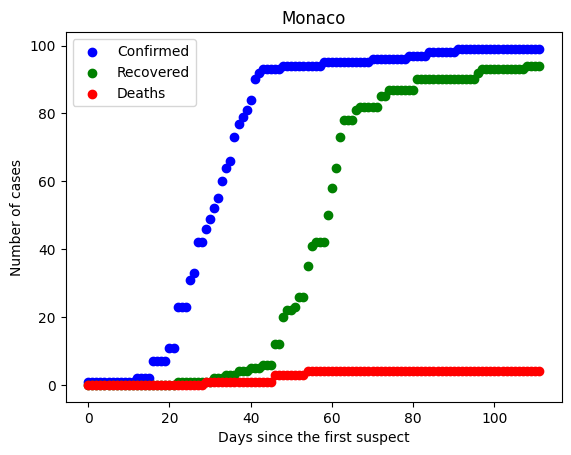

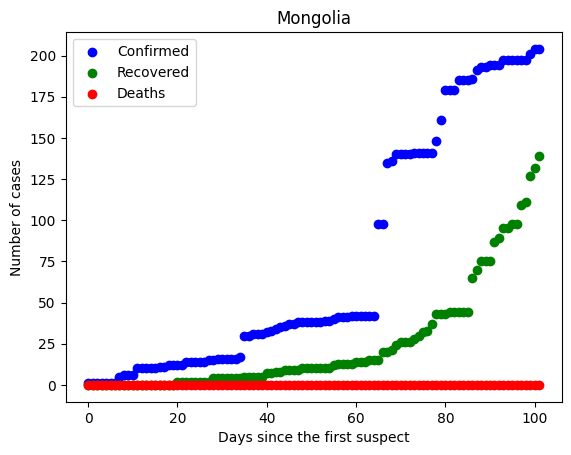

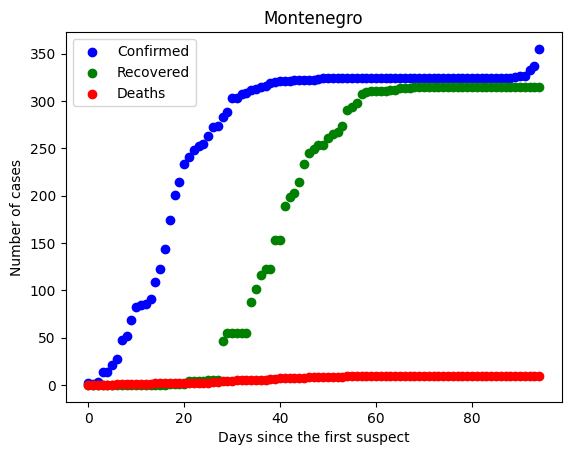

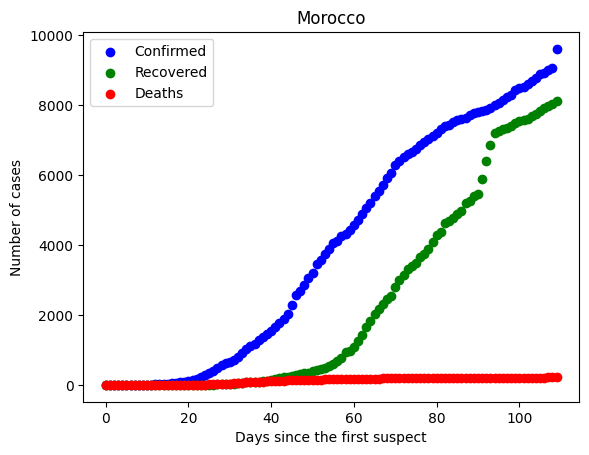

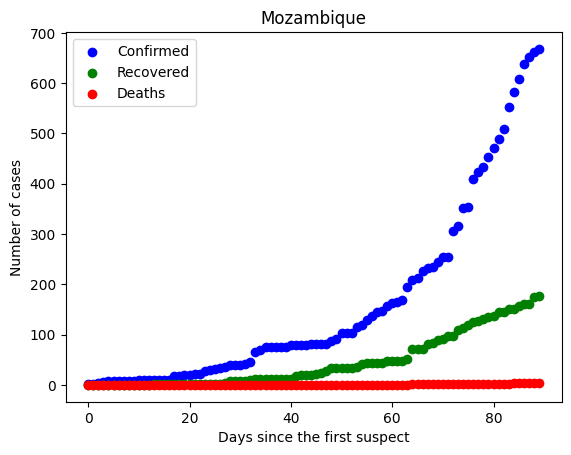

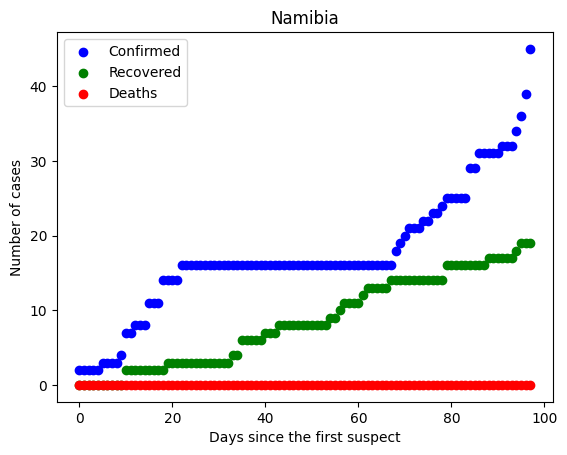

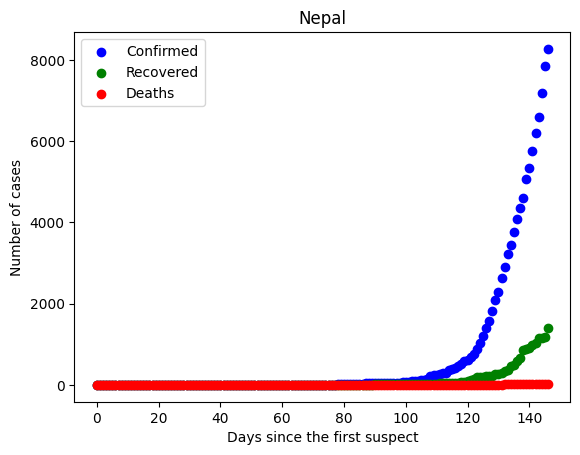

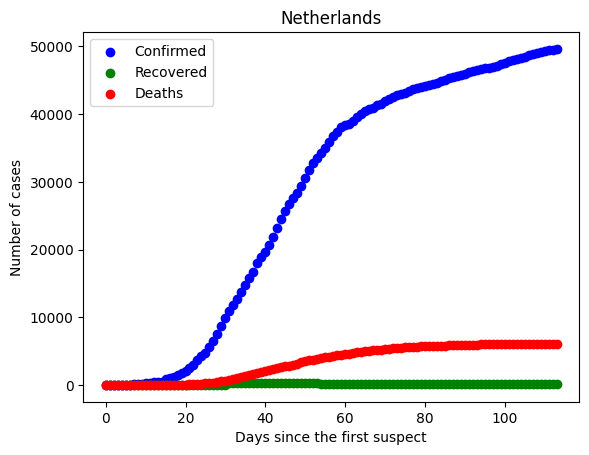

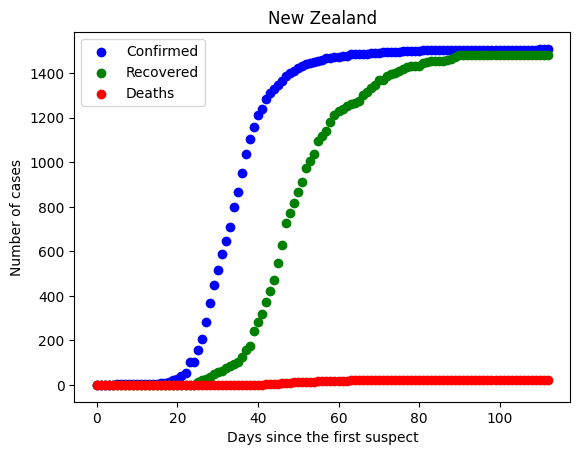

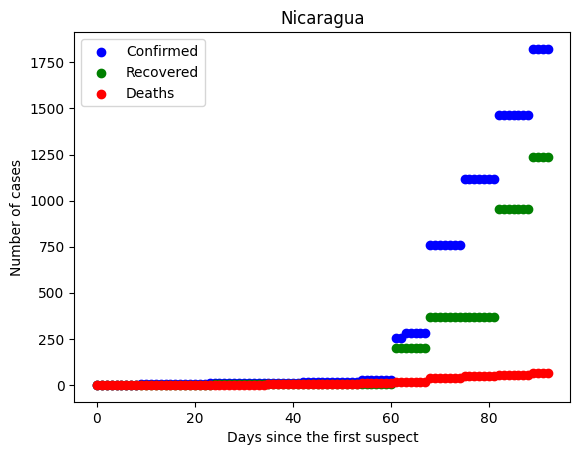

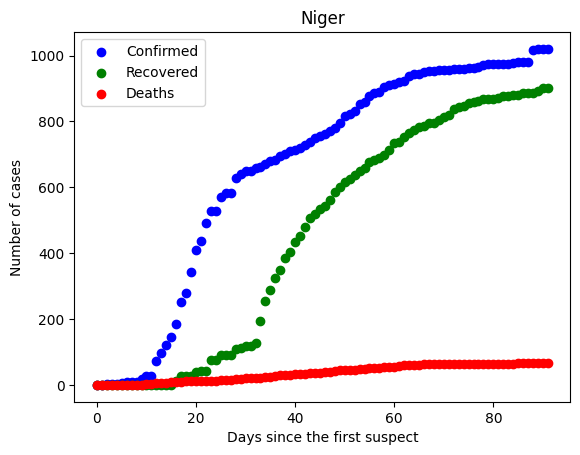

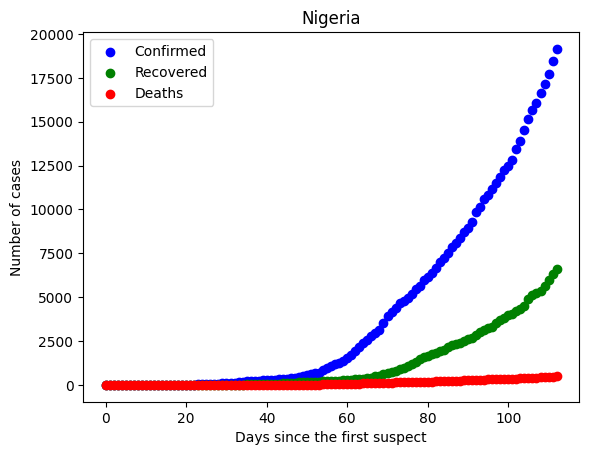

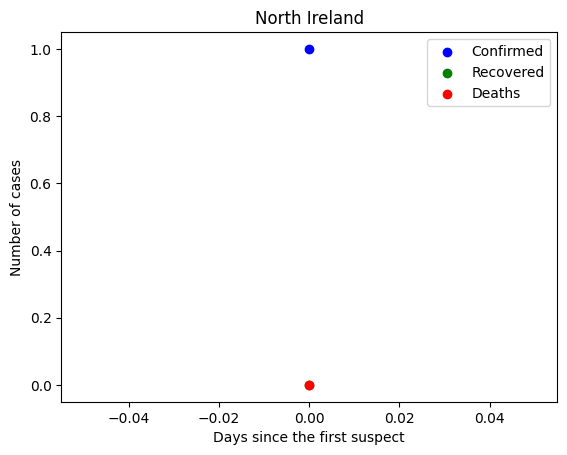

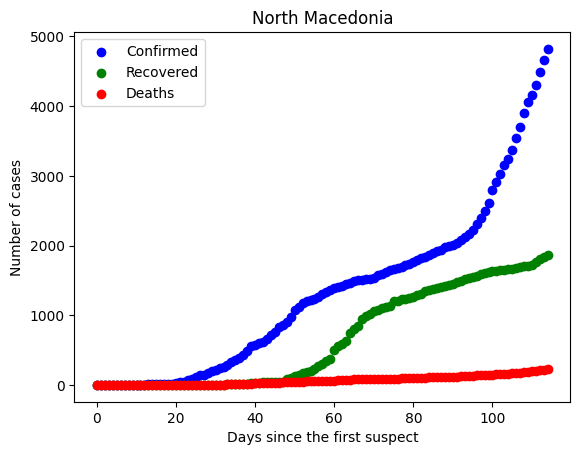

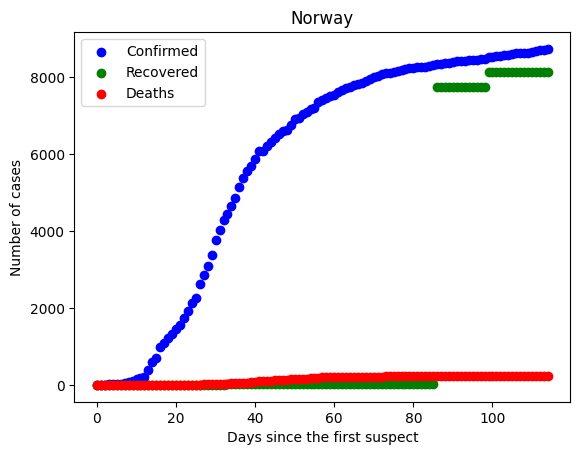

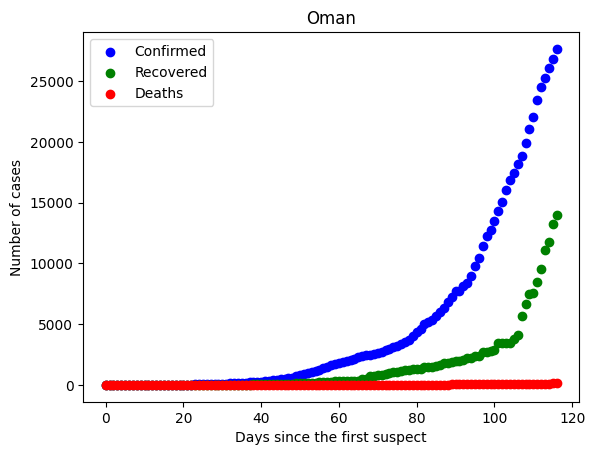

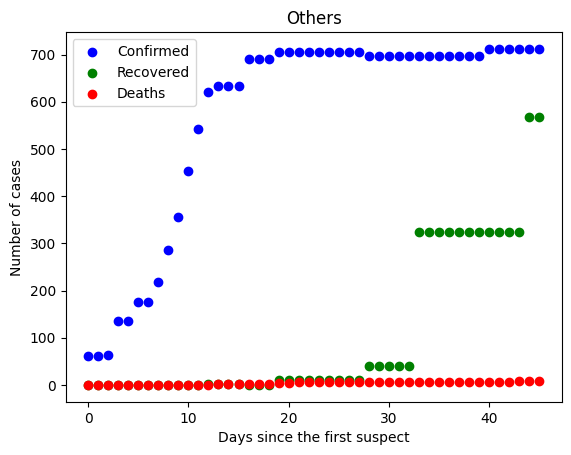

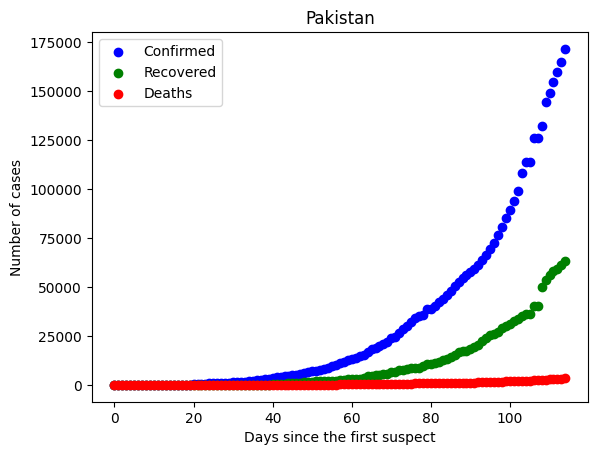

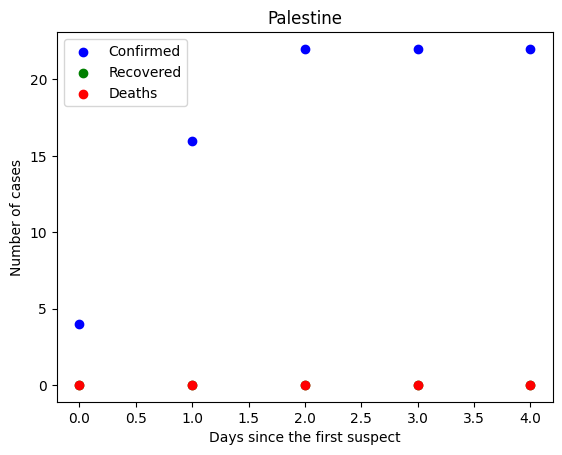

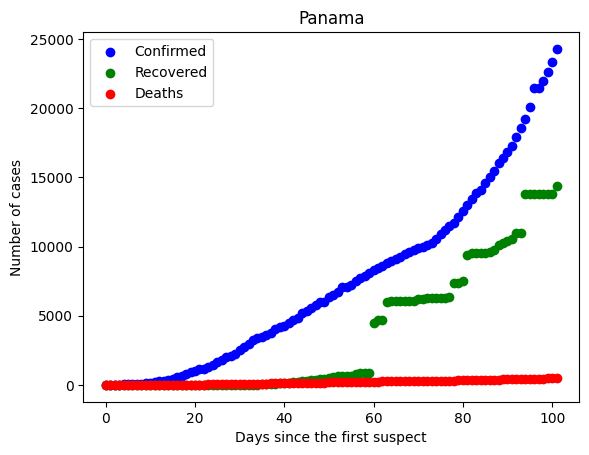

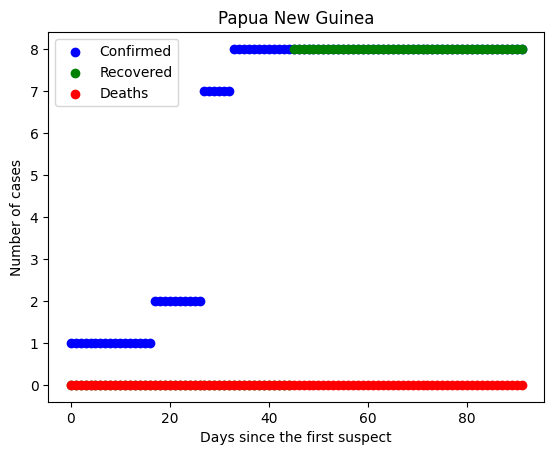

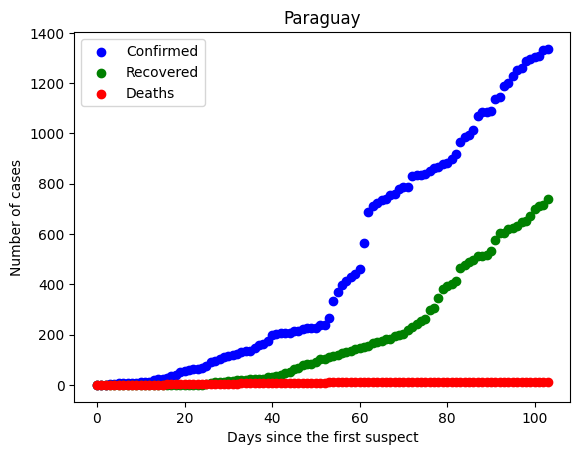

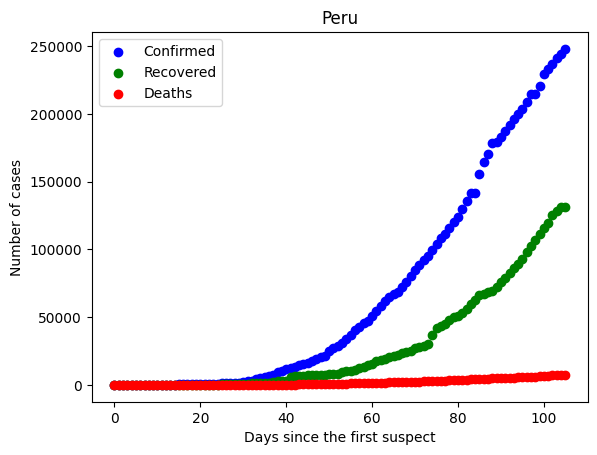

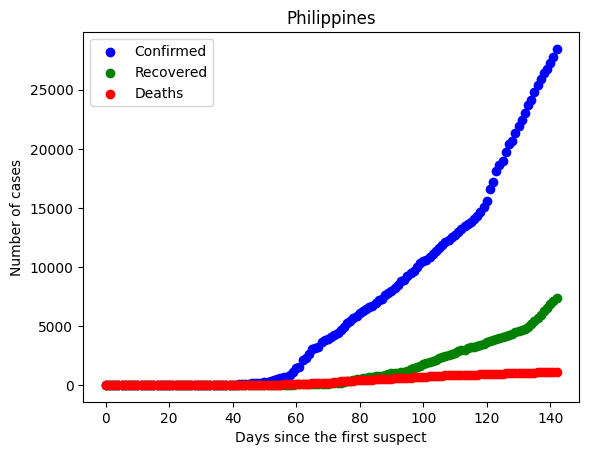

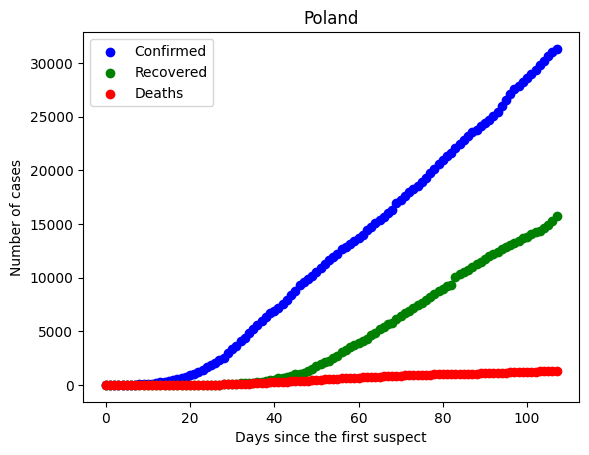

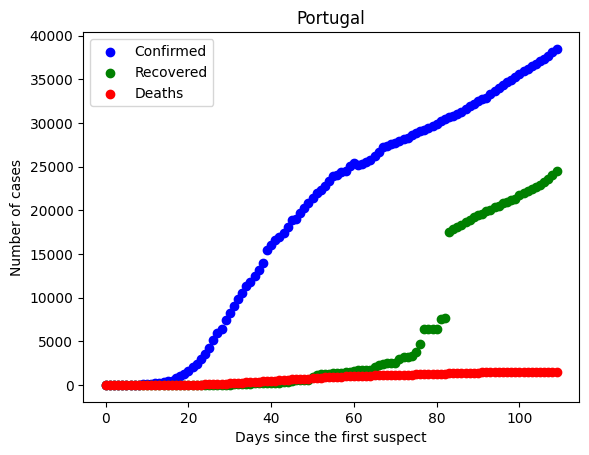

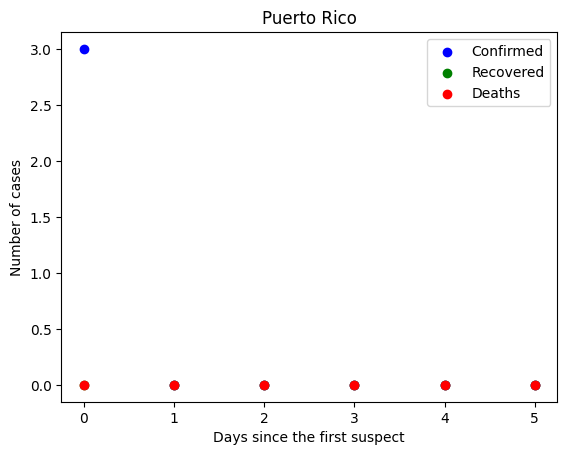

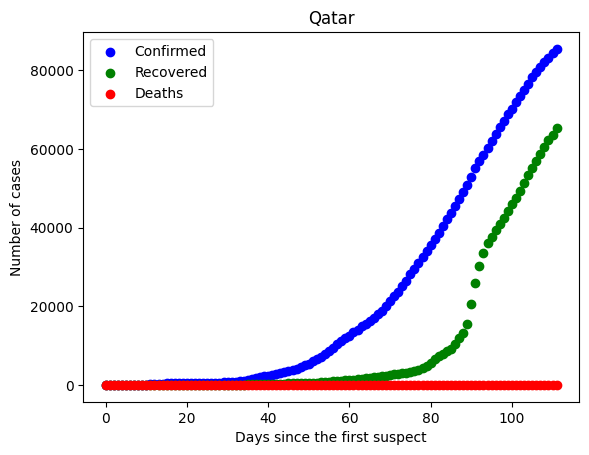

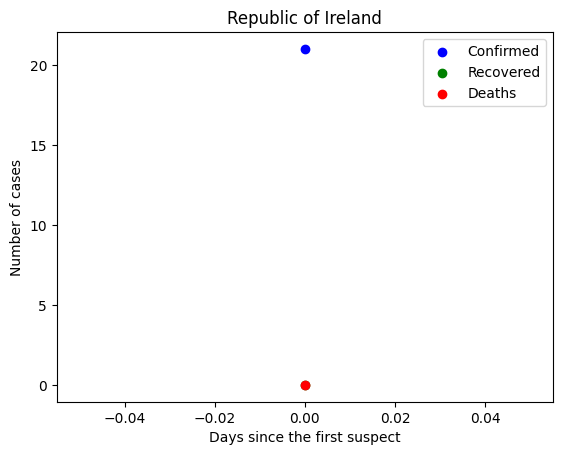

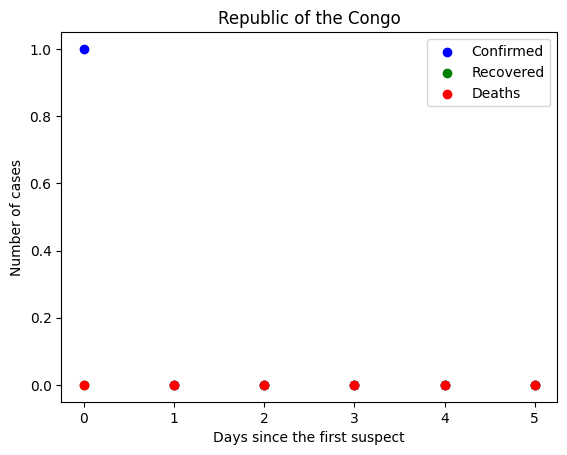

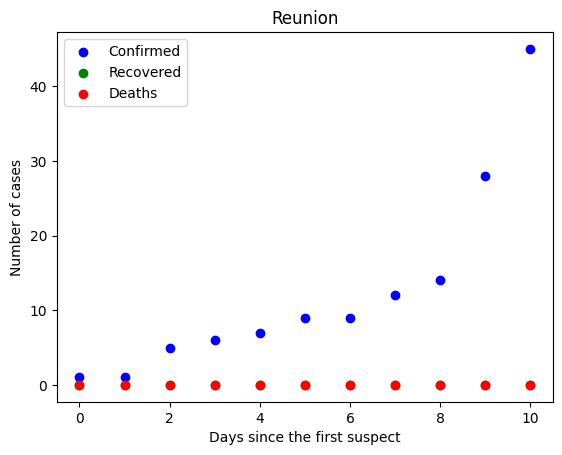

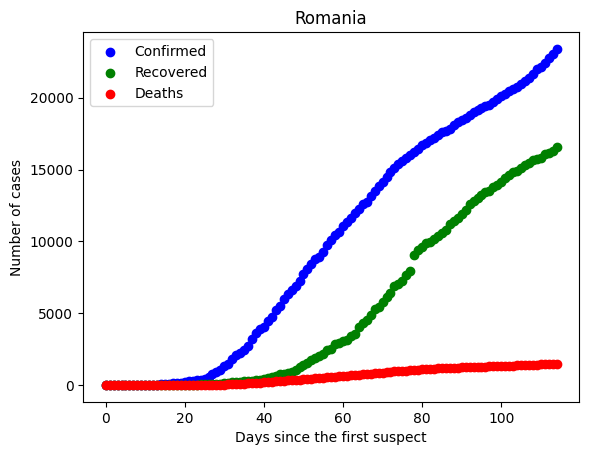

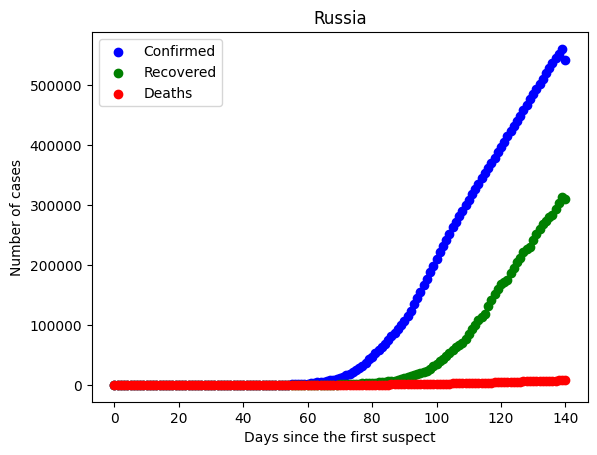

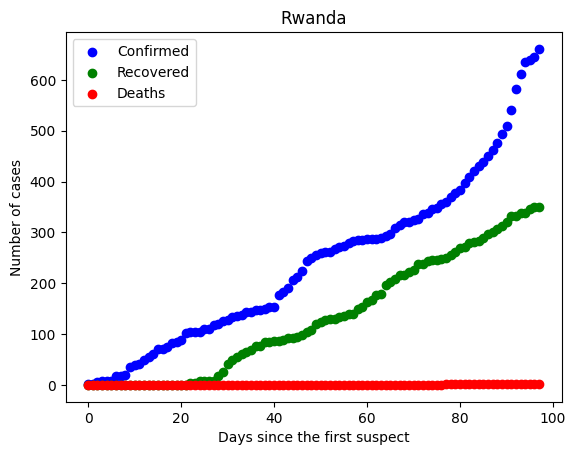

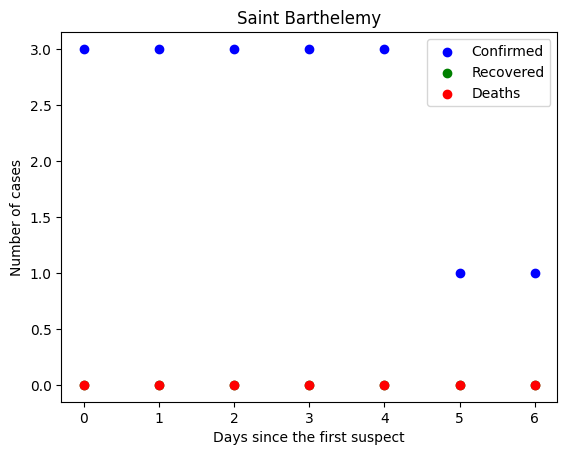

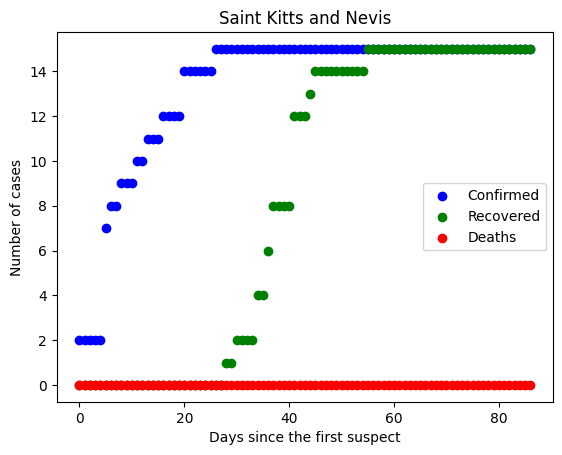

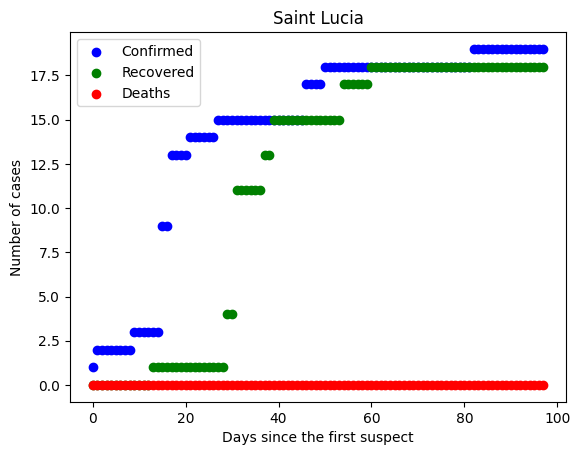

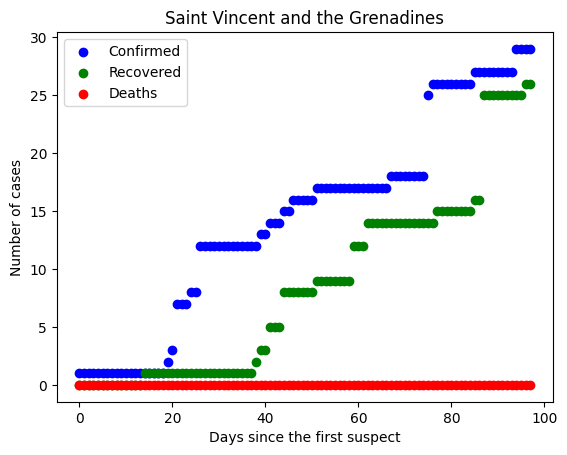

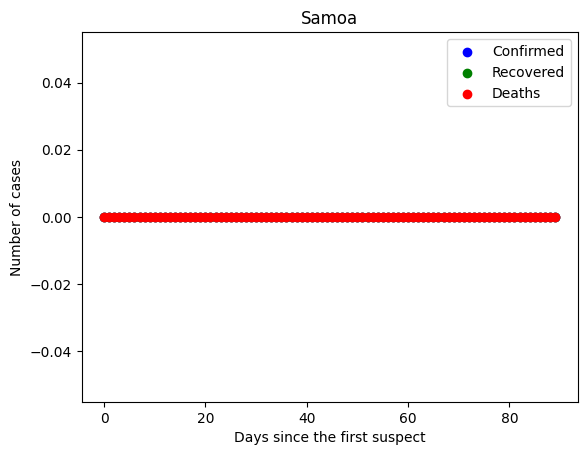

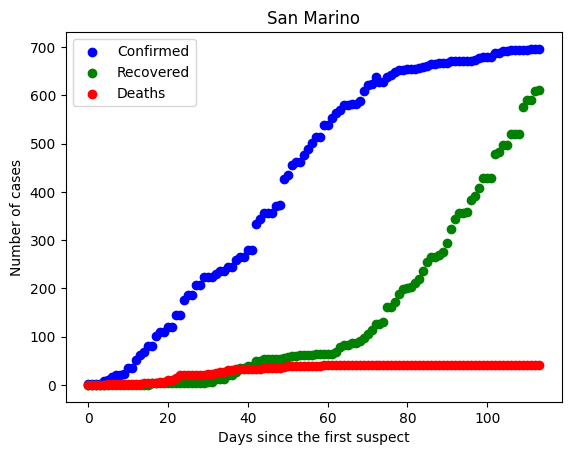

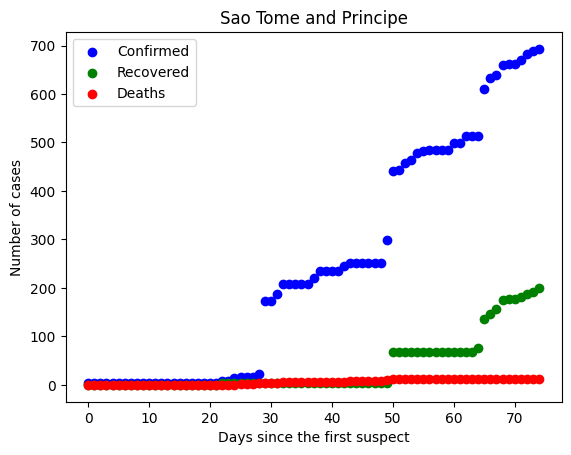

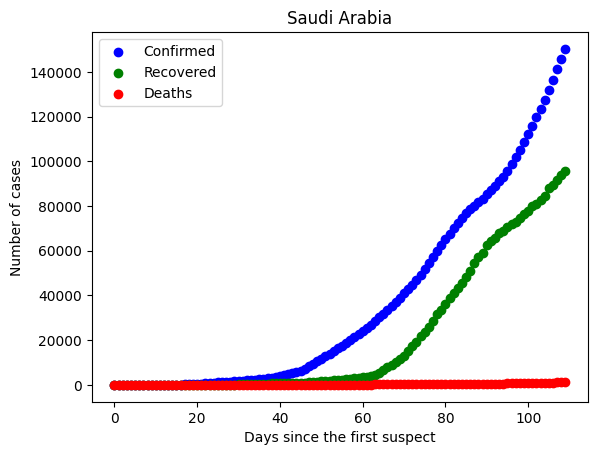

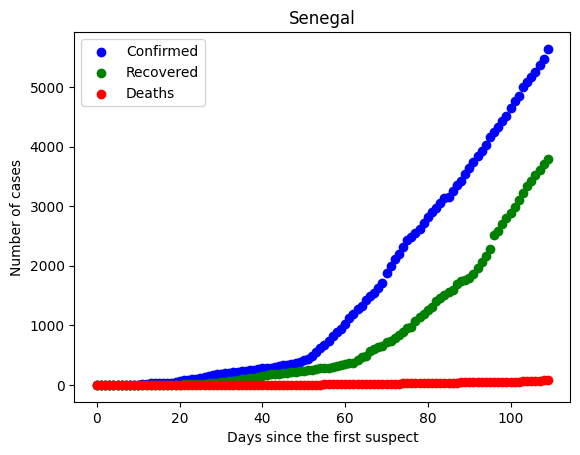

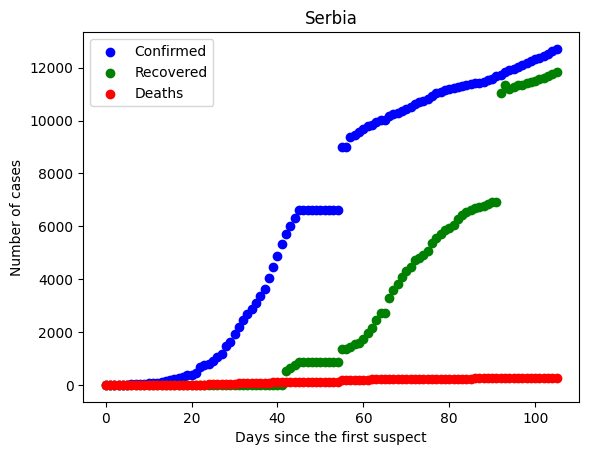

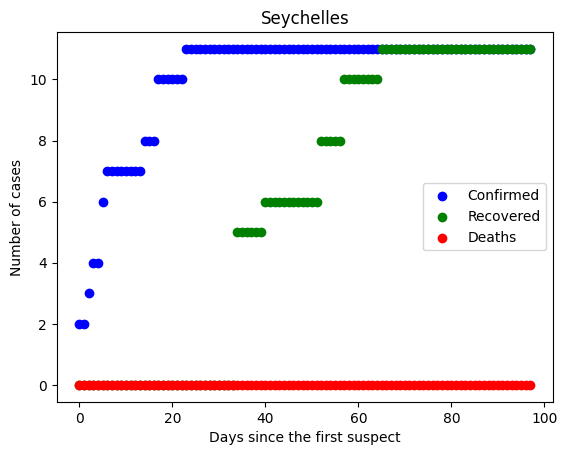

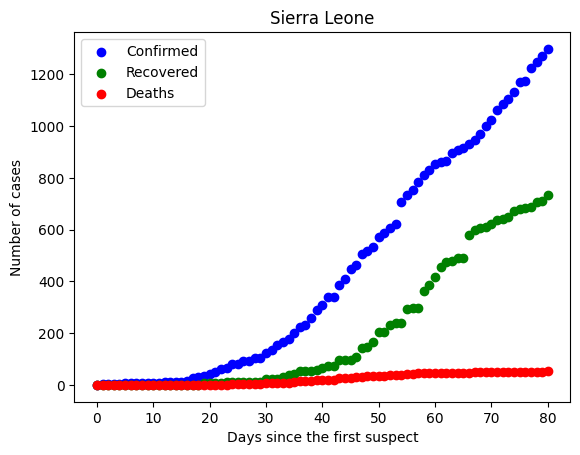

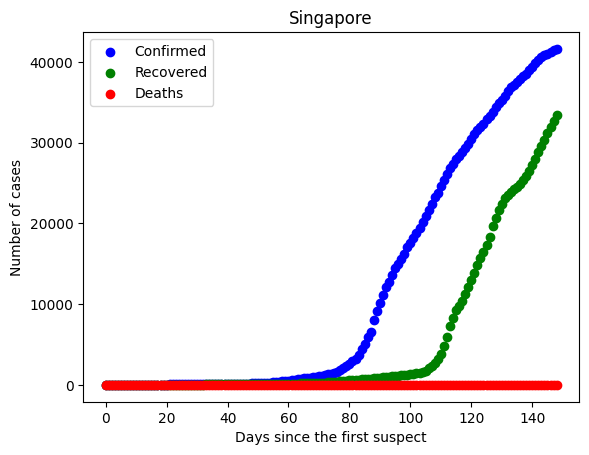

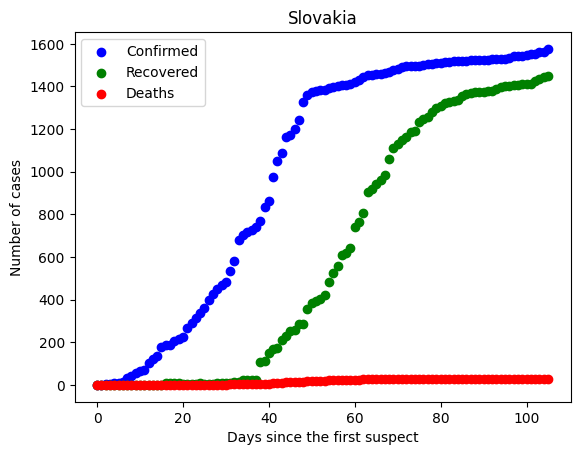

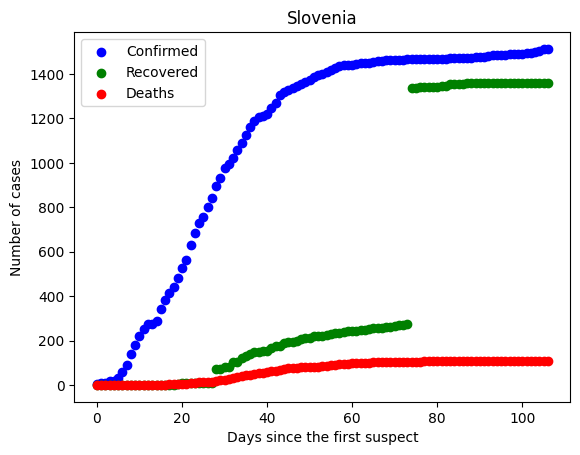

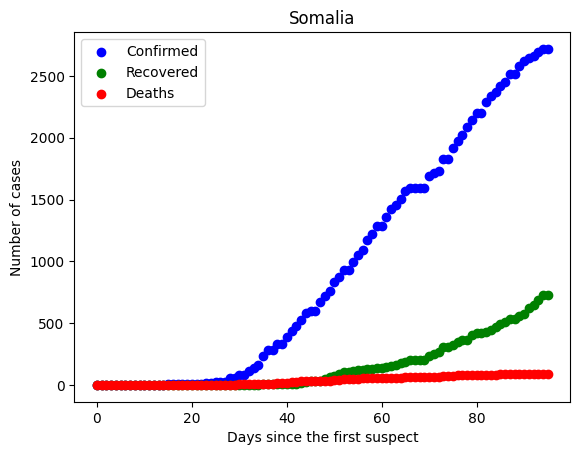

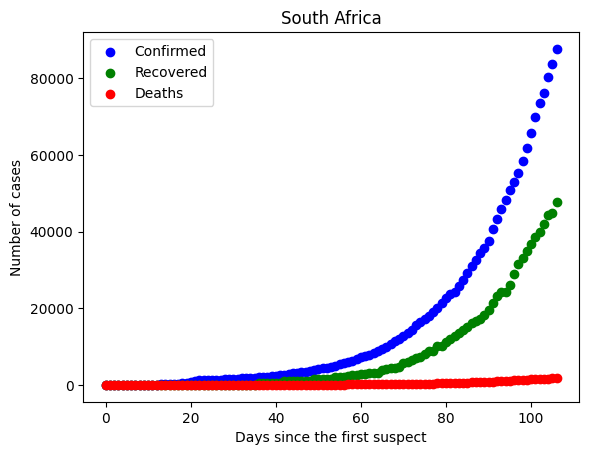

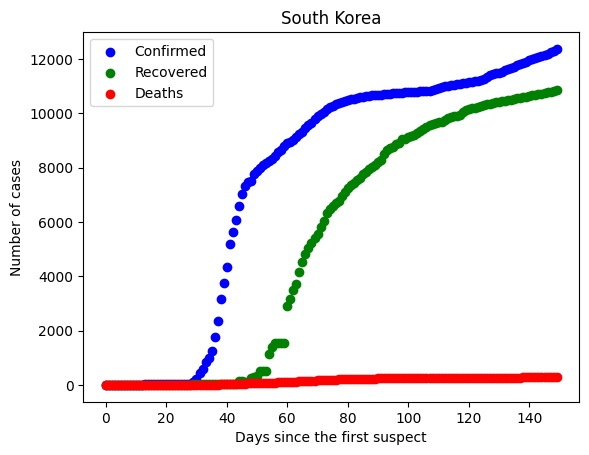

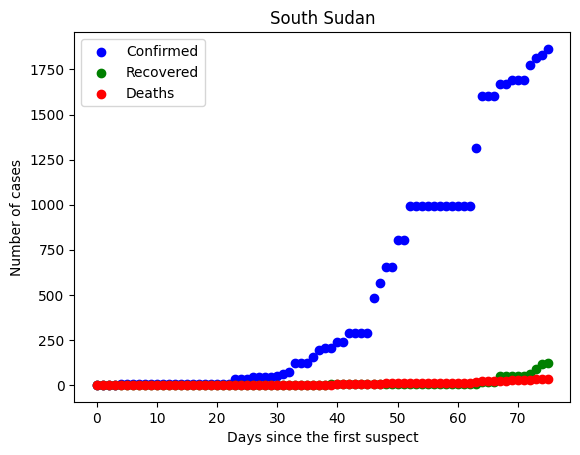

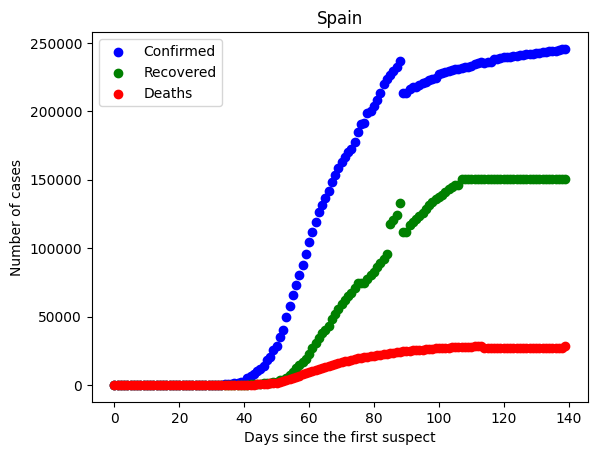

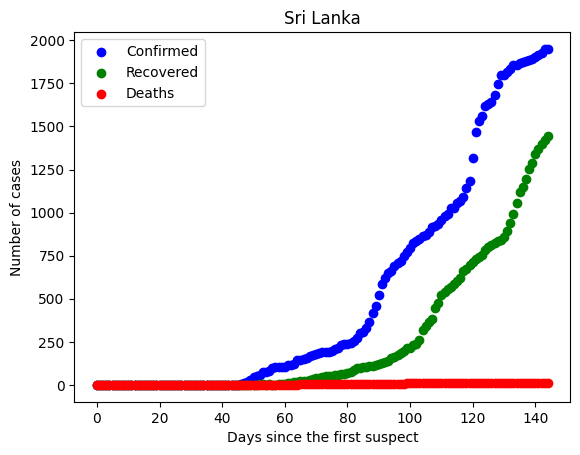

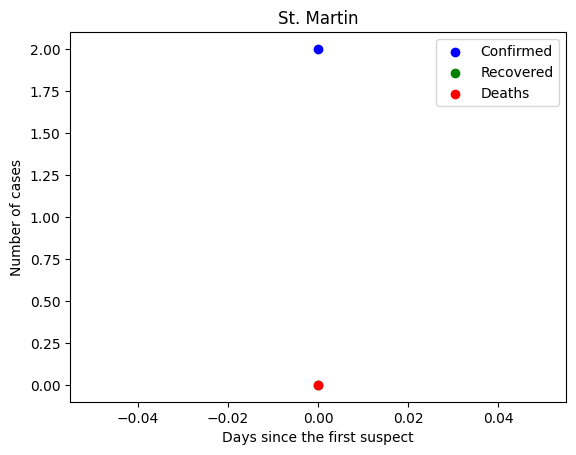

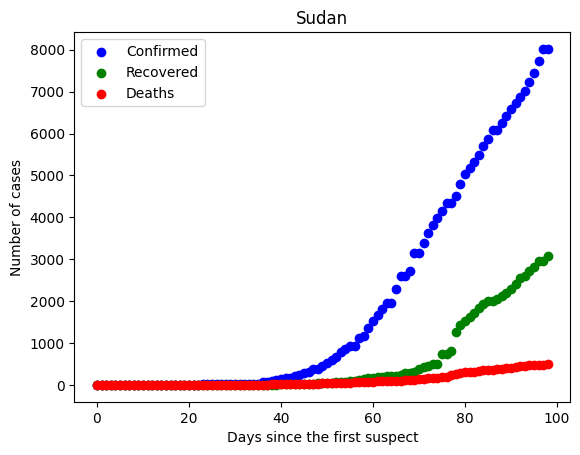

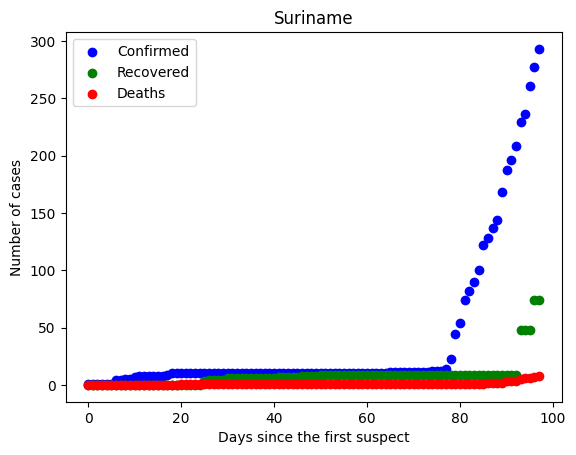

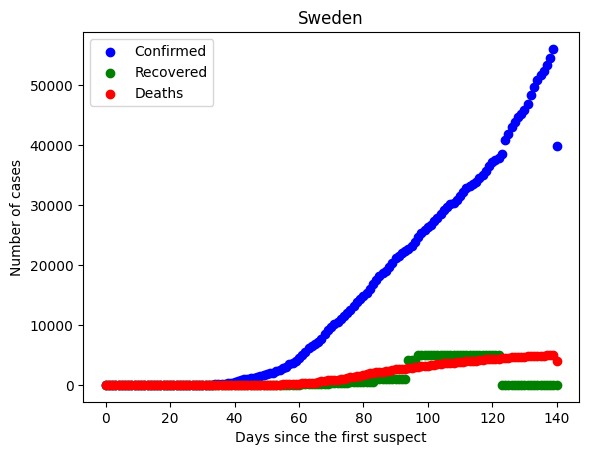

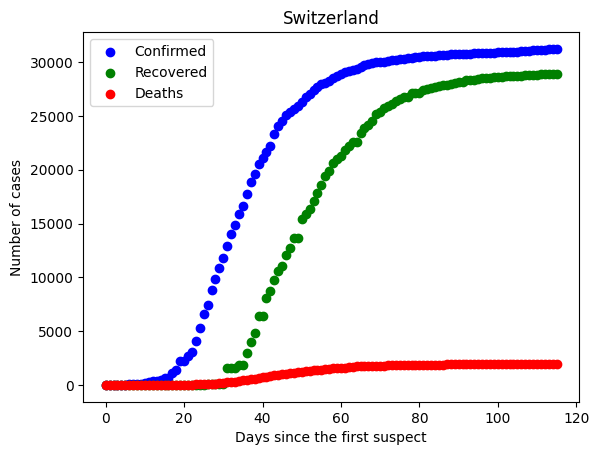

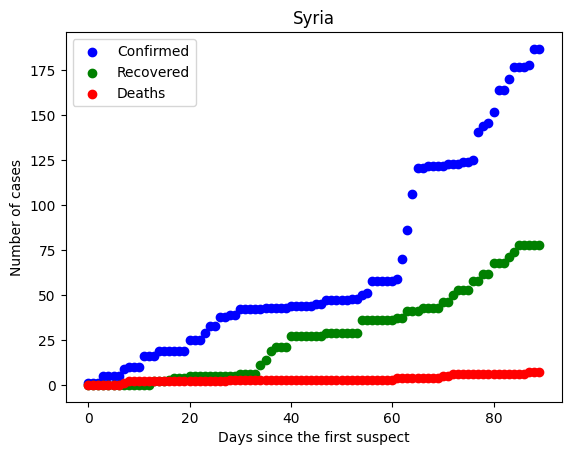

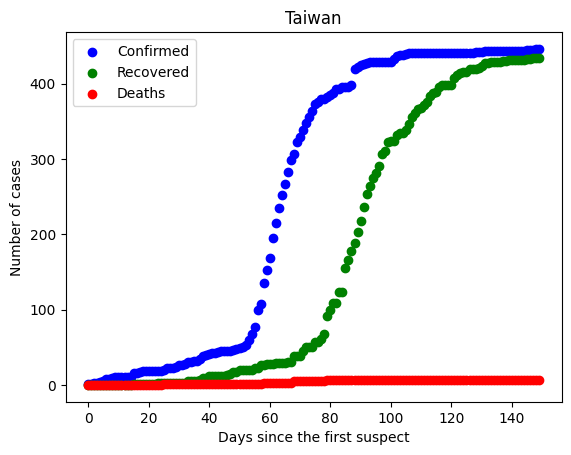

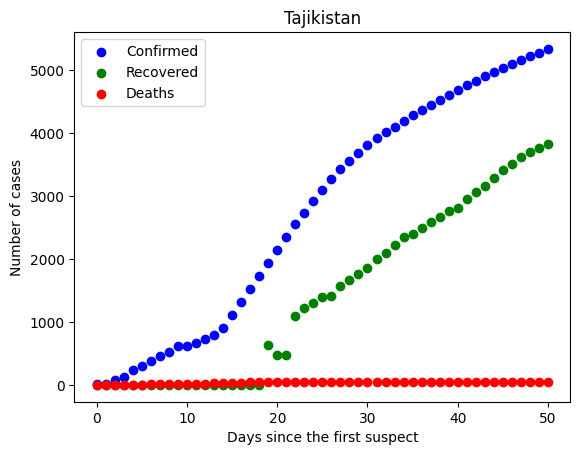

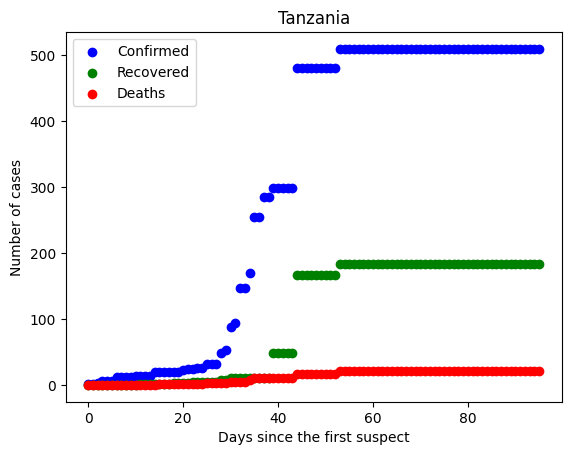

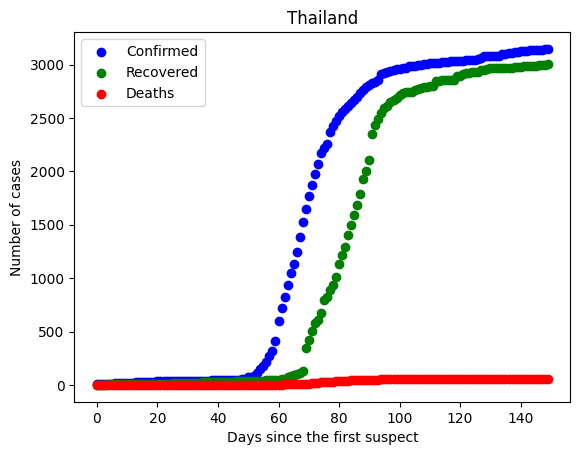

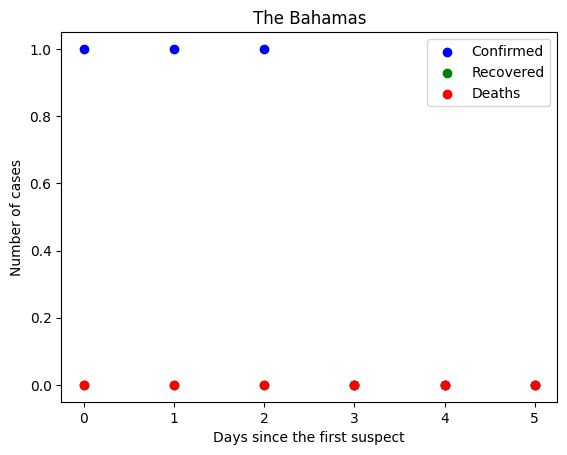

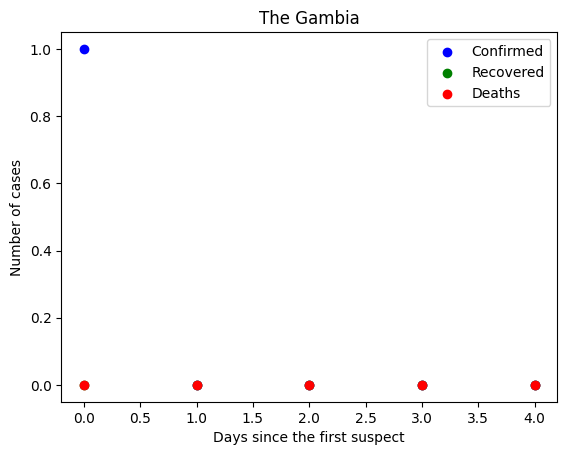

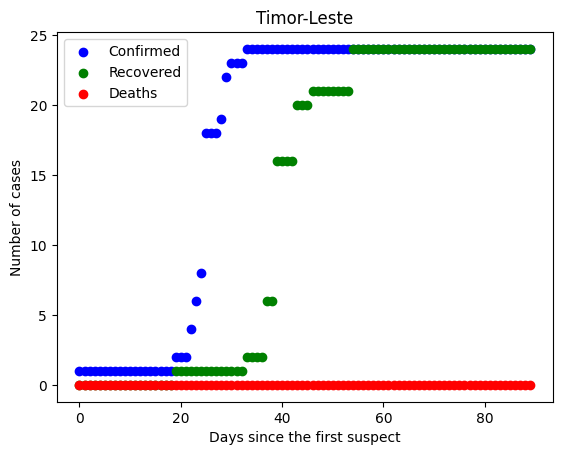

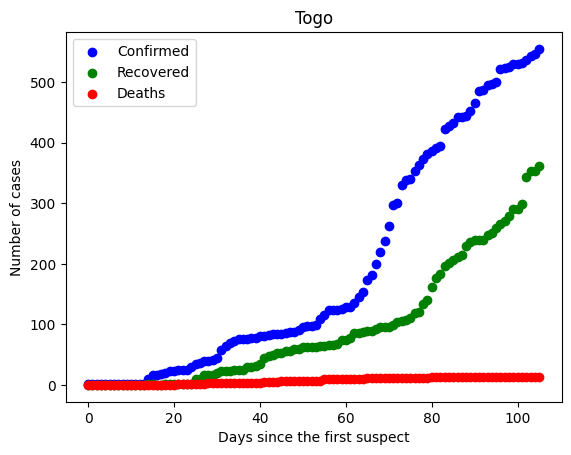

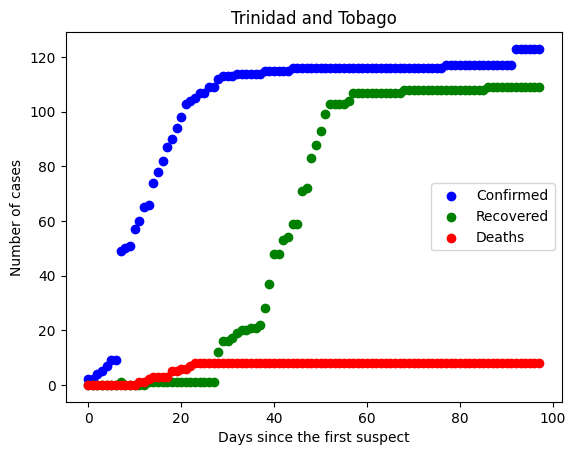

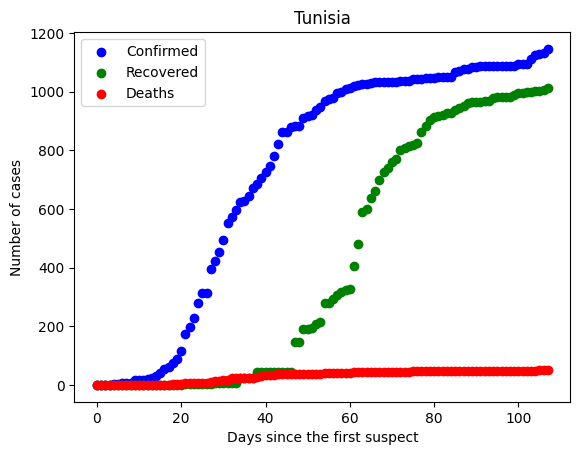

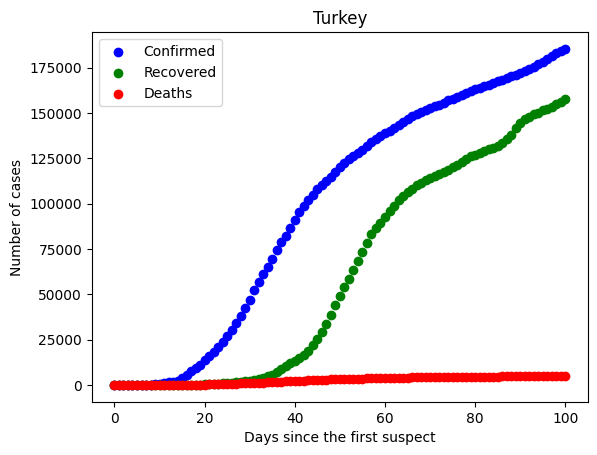

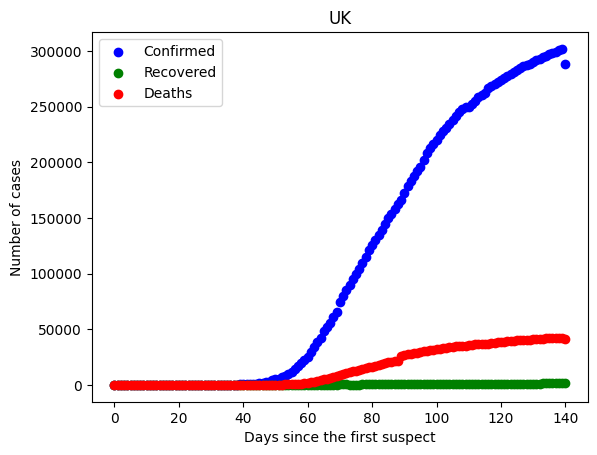

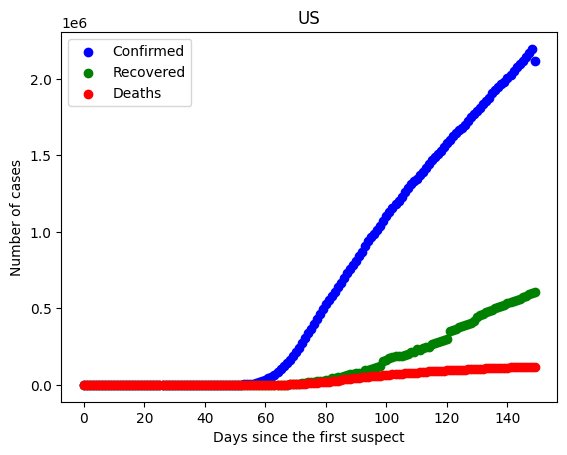

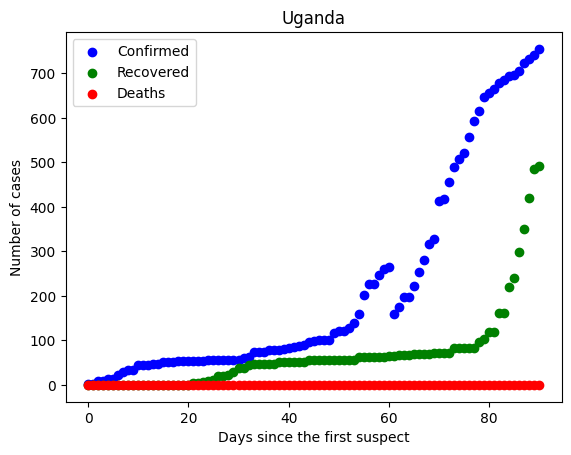

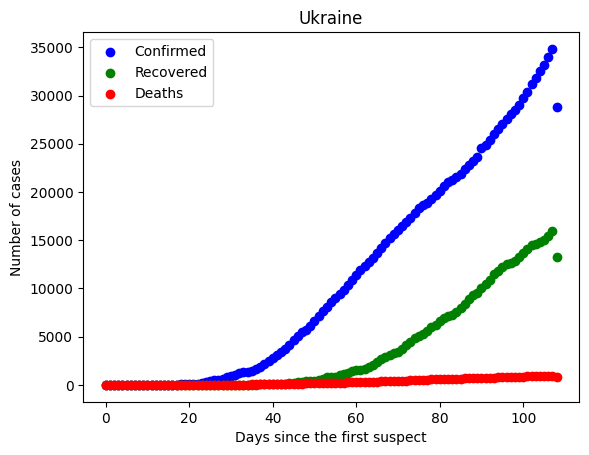

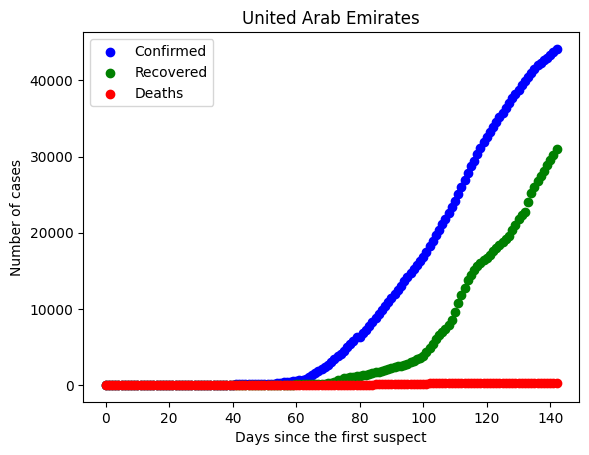

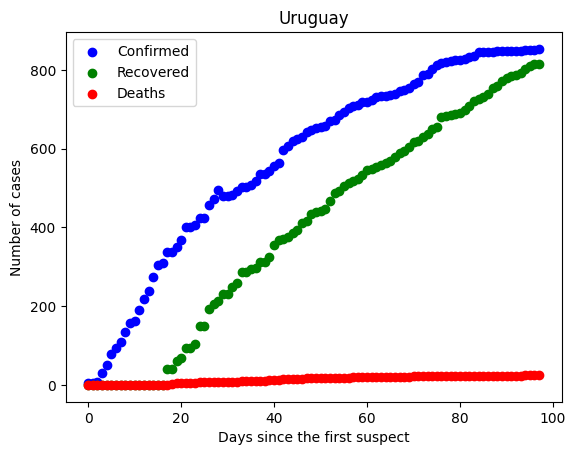

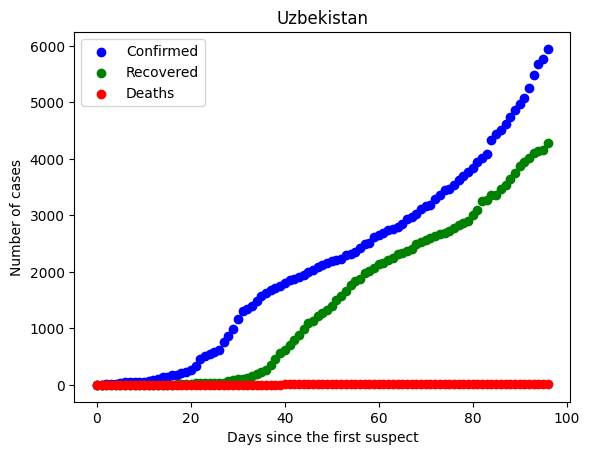

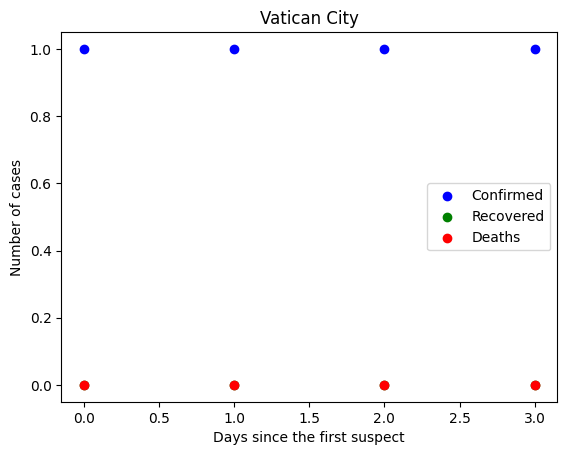

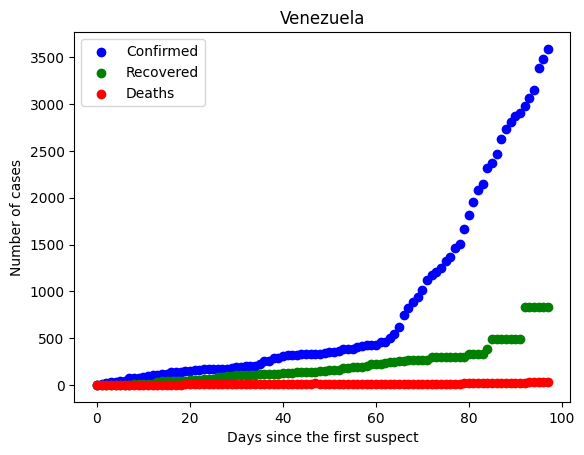

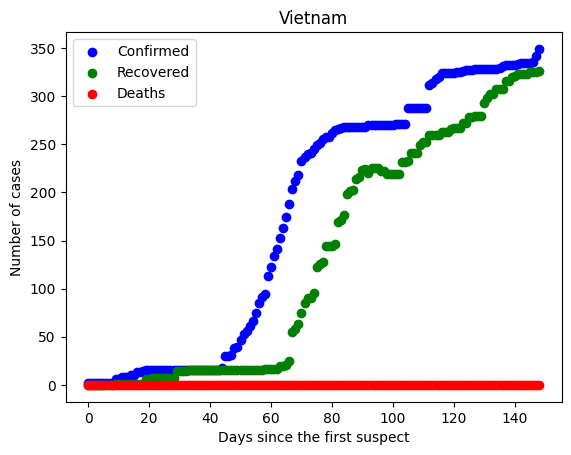

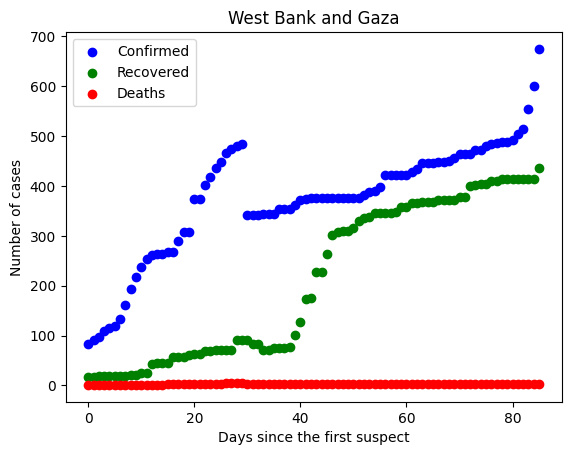

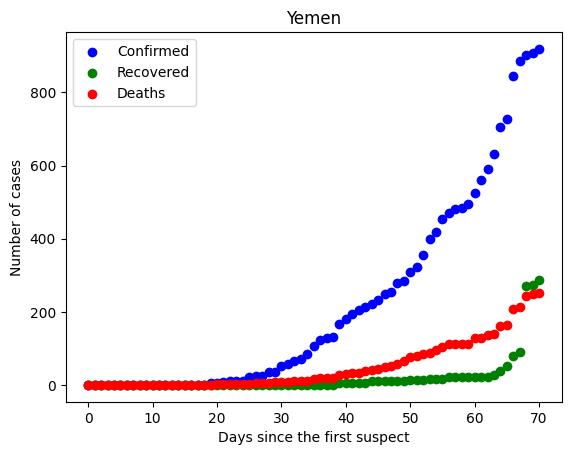

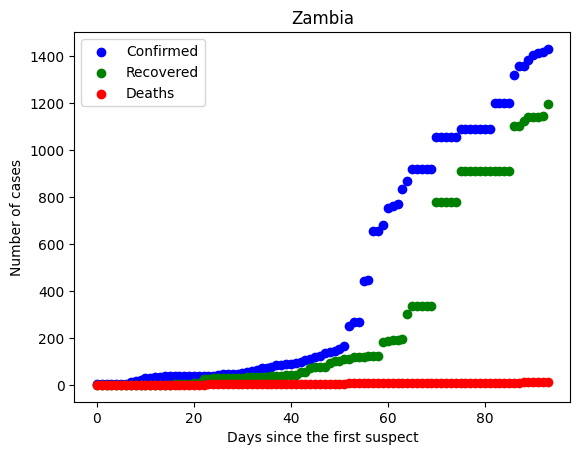

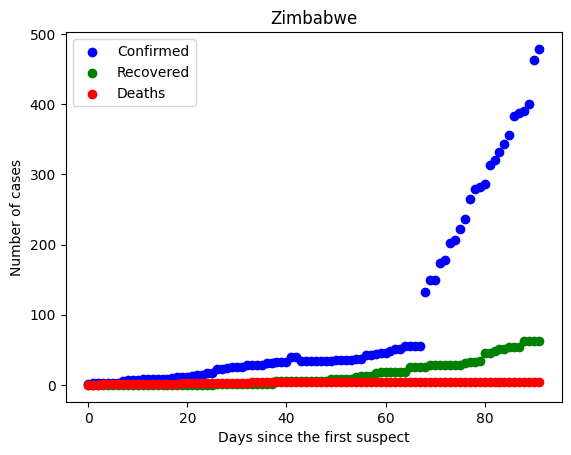

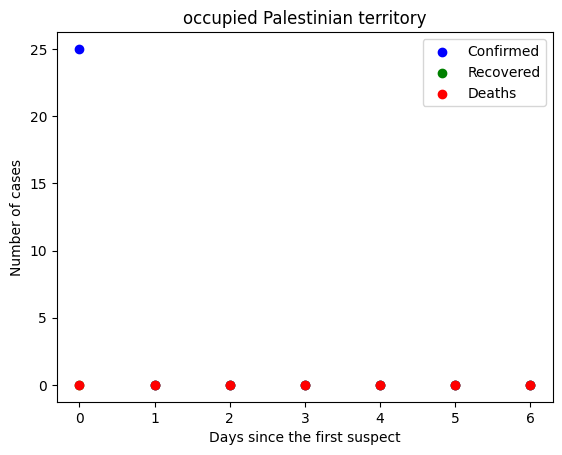

In [14]:
for idx in range(0,len(countries)):
    C = df3[df3['Original_Country']==countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

In [15]:
df4 = df3.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

<ipython-input-15-79dfde633022>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4 = df3.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()


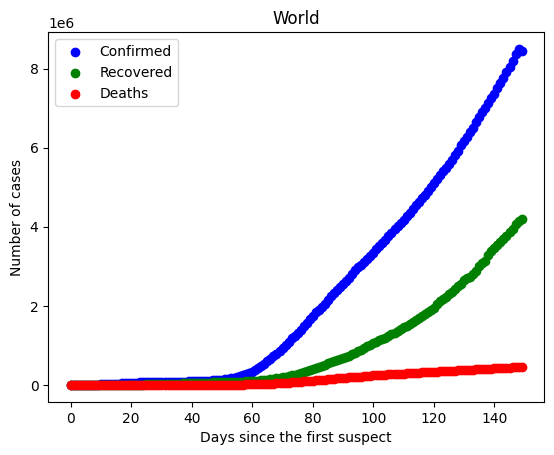

In [19]:
C = df4
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()